---
# Setting environment

In [1]:
# # !pip install scipy==1.13.1
# # !pip install hmmlearn
# # !pip install numpy==1.26.4
# # !pip install pandas==2.1.4

# # !pip install matplotlib==3.7.1
# # !pip install scikit-learn==1.3.2
# # !pip install networkx==3.3
# # !pip install -u ucimlrepo
# # !pip install openpyxl
# # !pip install seaborn
# ! pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd
import numpy as np

from scipy import stats
from scipy.spatial.distance import euclidean
import networkx as nx
from hmmlearn import hmm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform

import random
import math
import pickle 

In [3]:
# for classifier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [4]:
from functions import *

---
# Running all the code

In [5]:
np.random.seed(42)
BC_paper_transitional_matrix = np.array([
    [0.6963, 0.0000, 0.0403, 0.0541, 0.2093],
    [0.0000,1.0000,0.0000, 0.0000, 0.0000],
    [0.0959,0.0000, 0.8929, 0.0112, 0.0000],
    [0.0417, 0.0377, 0.1021, 0.7764, 0.0422],
    [0.0000, 0.1464, 0.0000,0.0629, 0.7907]
])

ignore_col = ["radius2", "texture2", "perimeter2", "area2", "smoothness2",
       "compactness2", "concavity2", "concave_points2", "symmetry2",
       "fractal_dimension2","radius3", "texture3", "perimeter3", "area3", "smoothness3",
       "compactness3", "concavity3", "concave_points3", "symmetry3",
       "fractal_dimension3","Diag"]

In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes, for Breast Cancer) 
X_BC = breast_cancer_wisconsin_diagnostic.data.features
X_BC.dropna
print(f"The shape of cancer dataset is {X_BC.shape}") #(569, 30)
y_BC = breast_cancer_wisconsin_diagnostic.data.targets 
print(f"The shape of cancer dataset (result) is {y_BC.shape}") #(569,1)
# convert it to 1 and 0
y_BC = y_BC.assign(Diag=lambda x: (x["Diagnosis"] == "M").astype(int))
y_BC = y_BC.drop("Diagnosis", axis=1)
print("no.of dieases ")
print(len(y_BC[y_BC["Diag"]==1])) #212
print("no.of health ")
print(len(y_BC[y_BC["Diag"]==0])) #357



The shape of cancer dataset is (569, 30)
The shape of cancer dataset (result) is (569, 1)
no.of dieases 
212
no.of health 
357


In [7]:
std_X_BC,X_BC_mean, X_BC_sd = standardise_dataset(X_BC)

length = [30,40,50]
no_ts = [200,300,400]
BC_time_series,BC_path = multi_pseudo_time_series(length,no_ts, std_X_BC,y_BC,42)


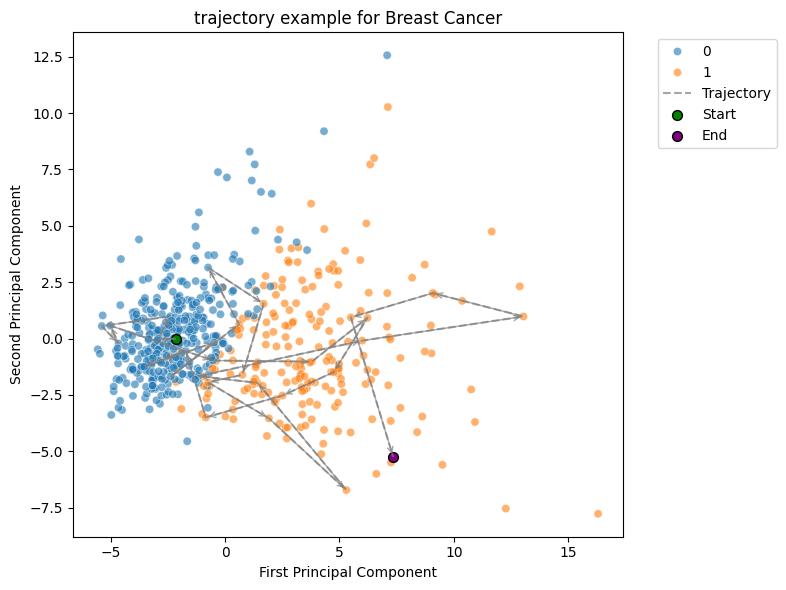

In [8]:
#seeing the trajectory

np.random.seed(42)
random_no_BC = np.random.randint(len(BC_path["030,200"]))


plotting_trajectory((std_X_BC,y_BC),target_col = "Diag",trajectory_indices=BC_path["030,200"][random_no_BC],title="trajectory example for Breast Cancer")

In [9]:
#Before training a hidden markov model, we remove the diagnosis process
obs_BC, result_BC = split_dataframes(BC_time_series,1)

#obtaining the column name for further use
obs_BC_col = obs_BC[next(iter(obs_BC))][0].columns

In [10]:
# train a hmm model
BC_model,BC_pred = train_hmm_dict("Breast Cancer Data",obs_BC,5,42,1000)

Now start training data Breast Cancer Data: 030,200
Training End!
Now start training data Breast Cancer Data: 030,300
Training End!
Now start training data Breast Cancer Data: 030,400
Training End!
Now start training data Breast Cancer Data: 040,200
Training End!
Now start training data Breast Cancer Data: 040,300
Training End!
Now start training data Breast Cancer Data: 040,400
Training End!
Now start training data Breast Cancer Data: 050,200
Training End!
Now start training data Breast Cancer Data: 050,300
Training End!
Now start training data Breast Cancer Data: 050,400
Training End!


In [11]:
for key, value in BC_model.items():
    with open(f"BC[{key}].pkl", "wb") as file:
        pickle.dump(value, file)

BC_from_pickle = {}
for key, value in BC_model.items():
    with open(f"BC[{key}].pkl", 'rb') as file:
        BC_from_pickle[key] = pickle.load(file)

In [12]:
# merging the observation, hidden and the diag
merge_BC = merging_dict(obs_BC,result_BC,BC_pred)

In [13]:
#visualise
#arrange hidden not yet
# plot_mean_by_hidden_dict(single_dataframe_dict(merge_BC), "Breast Cancer", ignore_col=ignore_col)


In [14]:
#after plotting the graph, we will align the hidden states
BC_order = {
    "030,200": [1, 4, 2, 5, 3],
    "030,300": [3, 4, 1, 2, 5],
    "030,400": [1, 3, 2, 5, 4],
    "040,200": [5, 2, 3, 1, 4],
    "040,300": [4, 1, 2, 3, 5],
    "040,400": [2, 3, 1, 5, 4],
    "050,200": [5, 2, 1, 3, 4],
    "050,300": [4, 1, 3, 2, 5],
    "050,400": [2, 5, 1, 3, 4]
}

Figure saved as Breast_Cancer_030,200.png
Figure saved as Breast_Cancer_030,300.png
Figure saved as Breast_Cancer_030,400.png
Figure saved as Breast_Cancer_040,200.png
Figure saved as Breast_Cancer_040,300.png
Figure saved as Breast_Cancer_040,400.png
Figure saved as Breast_Cancer_050,200.png
Figure saved as Breast_Cancer_050,300.png
Figure saved as Breast_Cancer_050,400.png


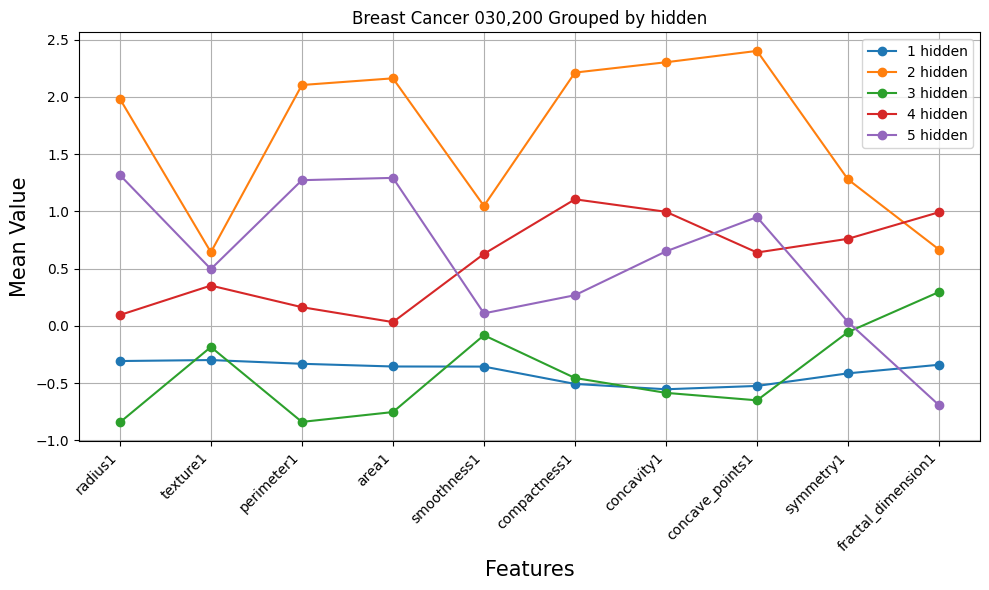

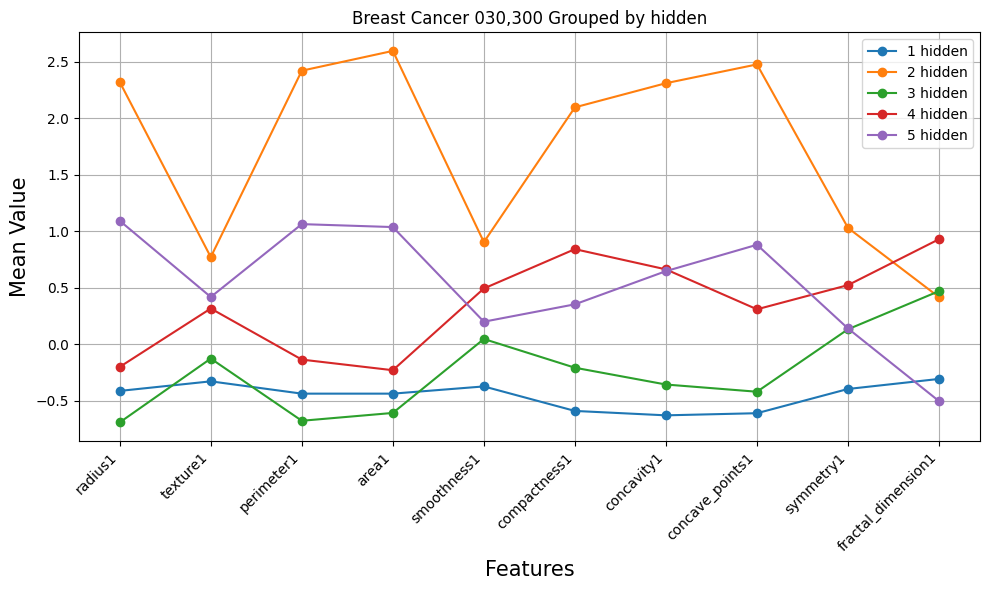

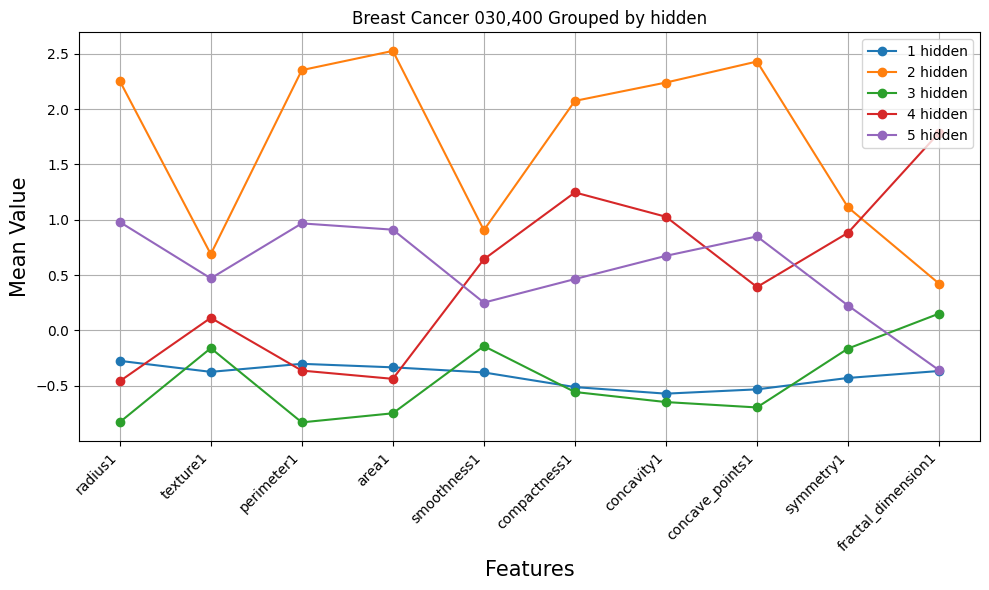

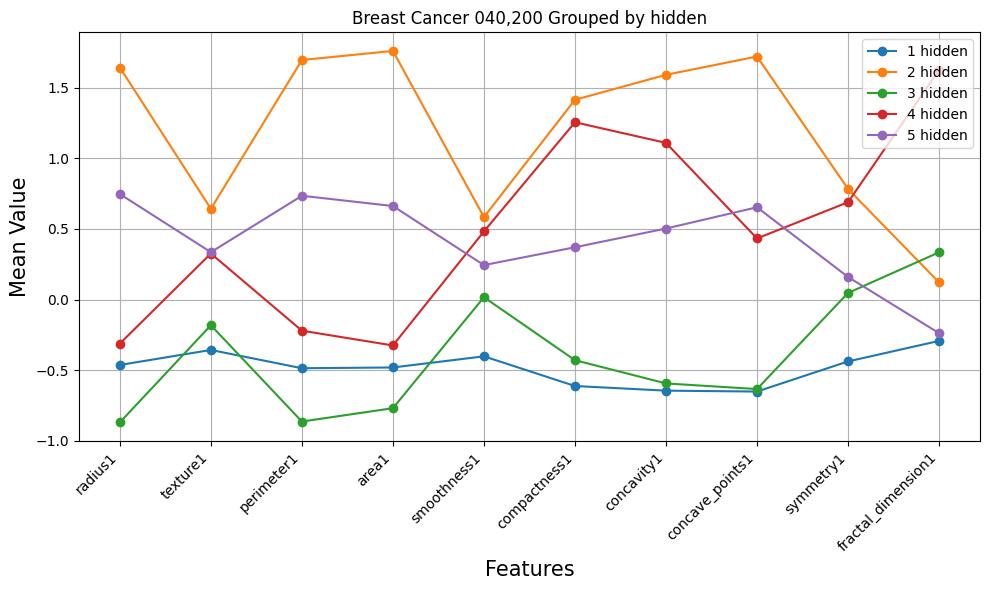

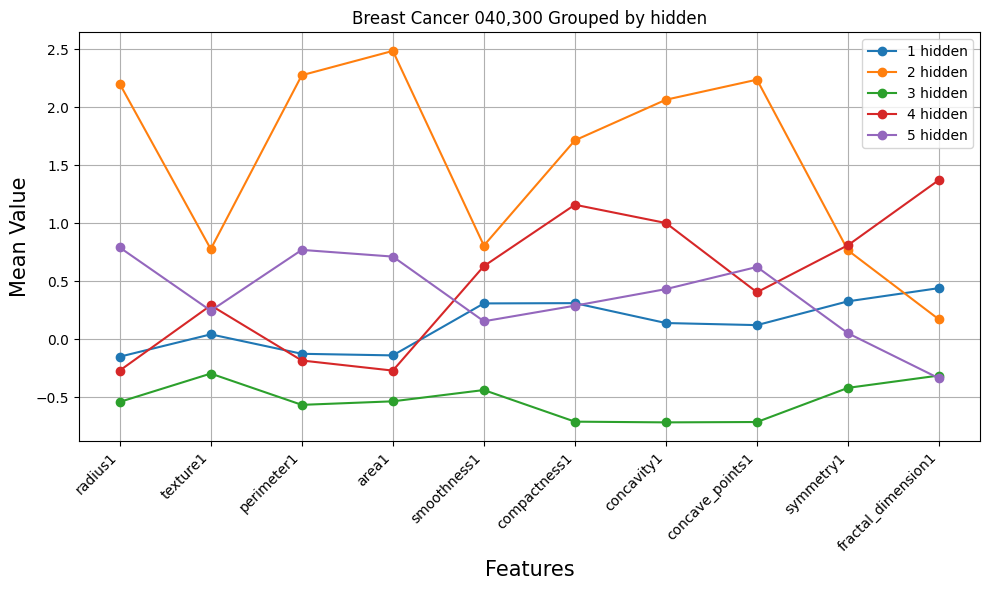

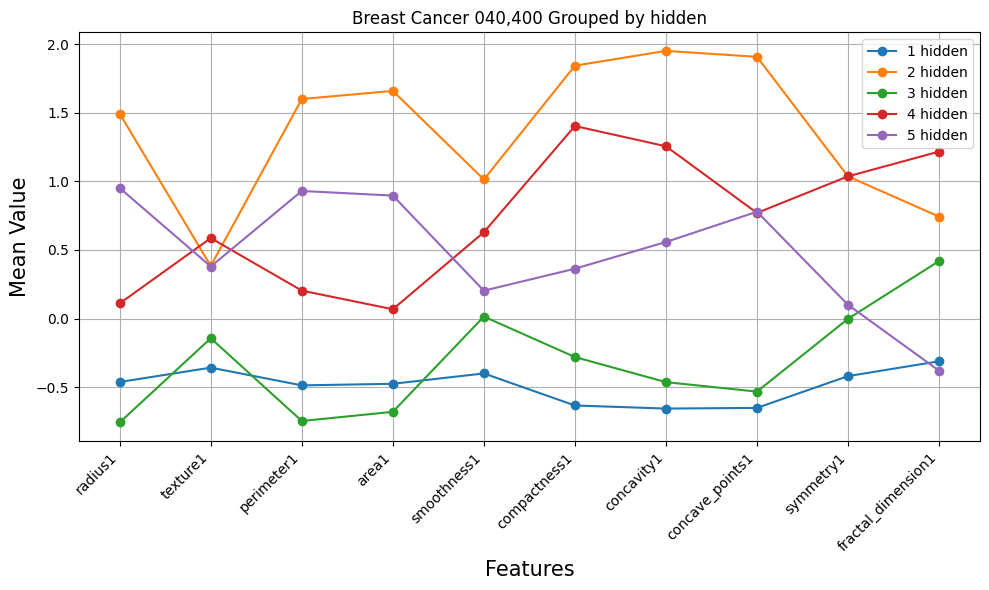

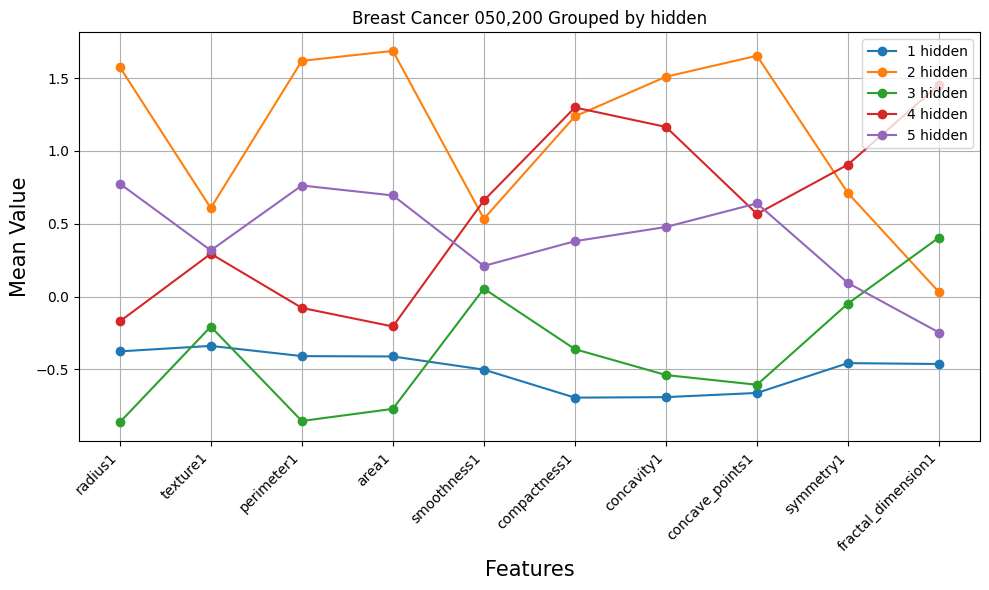

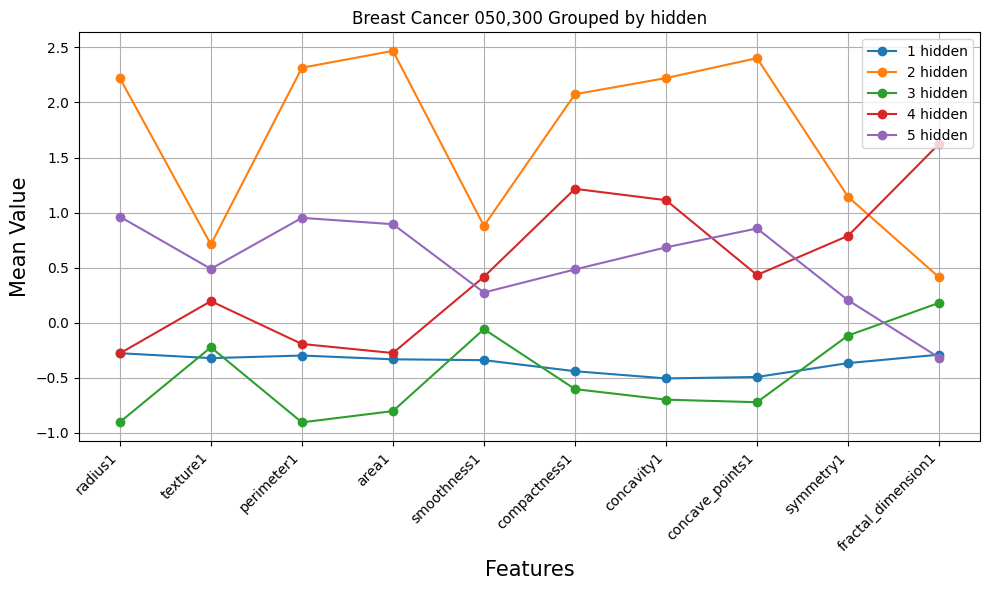

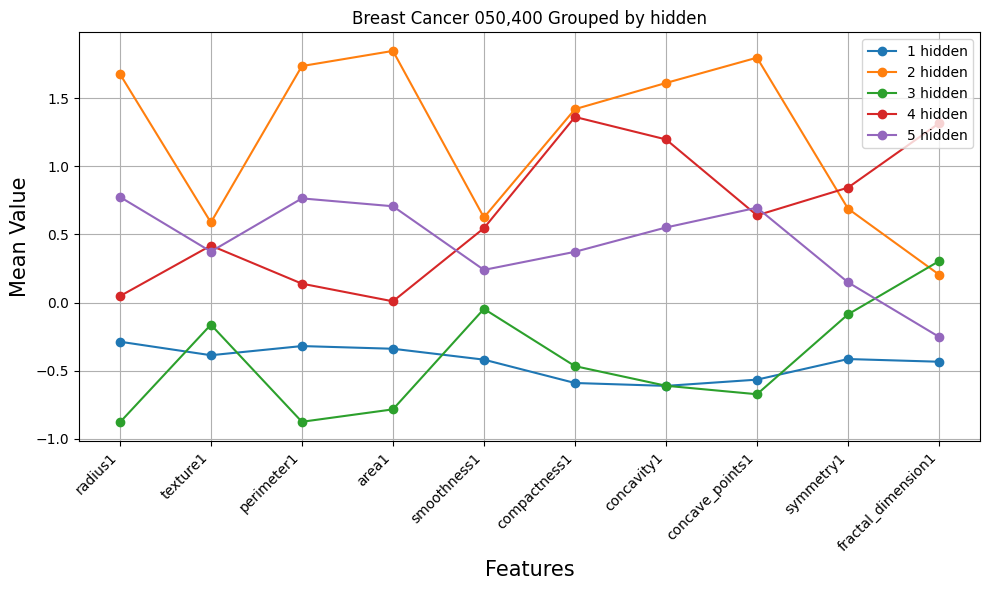

In [15]:
plot_mean_by_hidden_dict(single_dataframe_dict(merge_BC), "Breast Cancer", ignore_col=ignore_col, rename_order=BC_order)

plotting 030,200:
Rename dictionary: {0: 'State 1', 1: 'State 4', 2: 'State 2', 3: 'State 5', 4: 'State 3'}


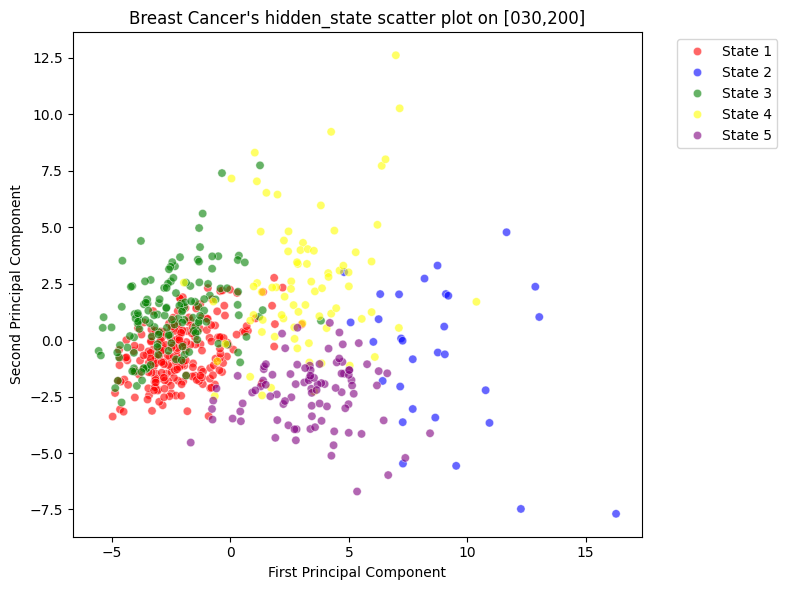

plotting 030,300:
Rename dictionary: {0: 'State 3', 1: 'State 4', 2: 'State 1', 3: 'State 2', 4: 'State 5'}


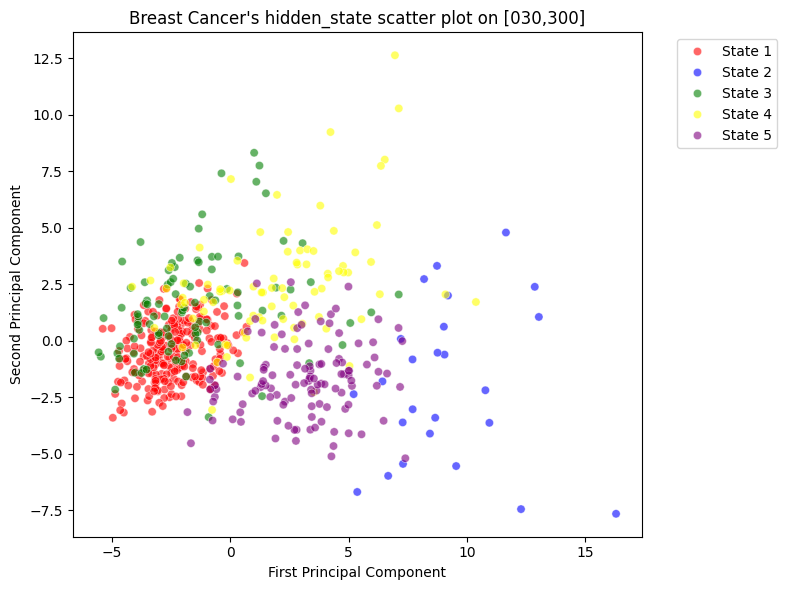

plotting 030,400:
Rename dictionary: {0: 'State 1', 1: 'State 3', 2: 'State 2', 3: 'State 5', 4: 'State 4'}


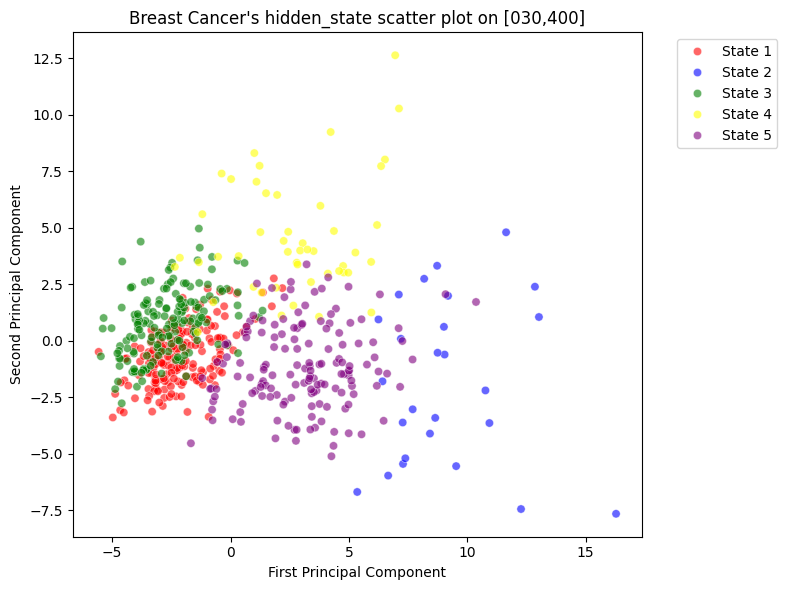

plotting 040,200:
Rename dictionary: {0: 'State 5', 1: 'State 2', 2: 'State 3', 3: 'State 1', 4: 'State 4'}


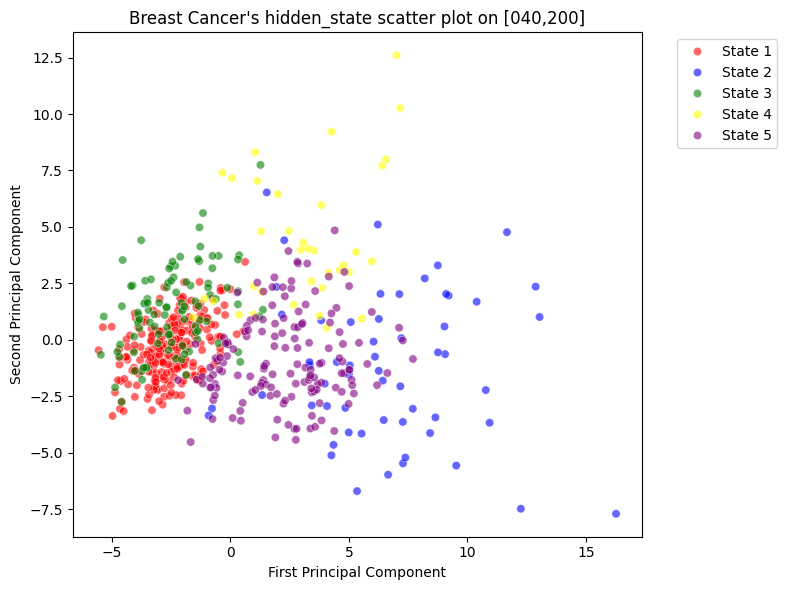

plotting 040,300:
Rename dictionary: {0: 'State 4', 1: 'State 1', 2: 'State 2', 3: 'State 3', 4: 'State 5'}


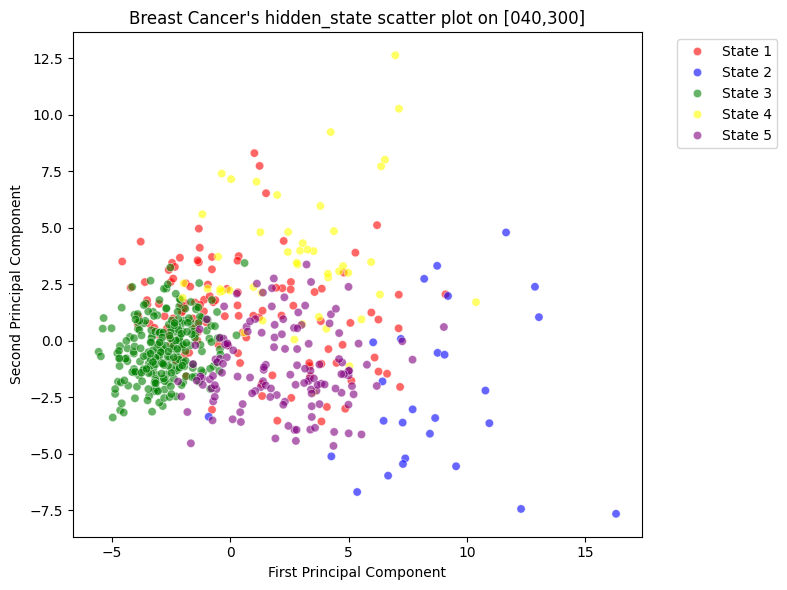

plotting 040,400:
Rename dictionary: {0: 'State 2', 1: 'State 3', 2: 'State 1', 3: 'State 5', 4: 'State 4'}


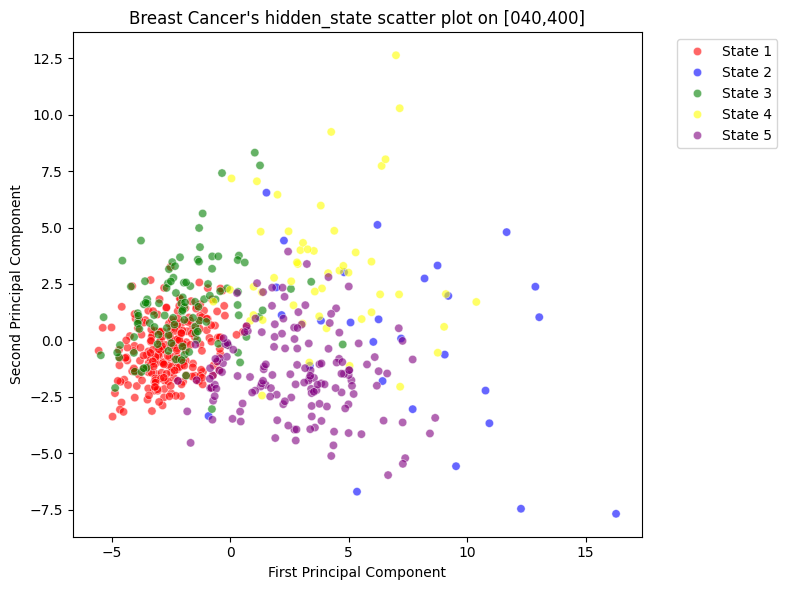

plotting 050,200:
Rename dictionary: {0: 'State 5', 1: 'State 2', 2: 'State 1', 3: 'State 3', 4: 'State 4'}


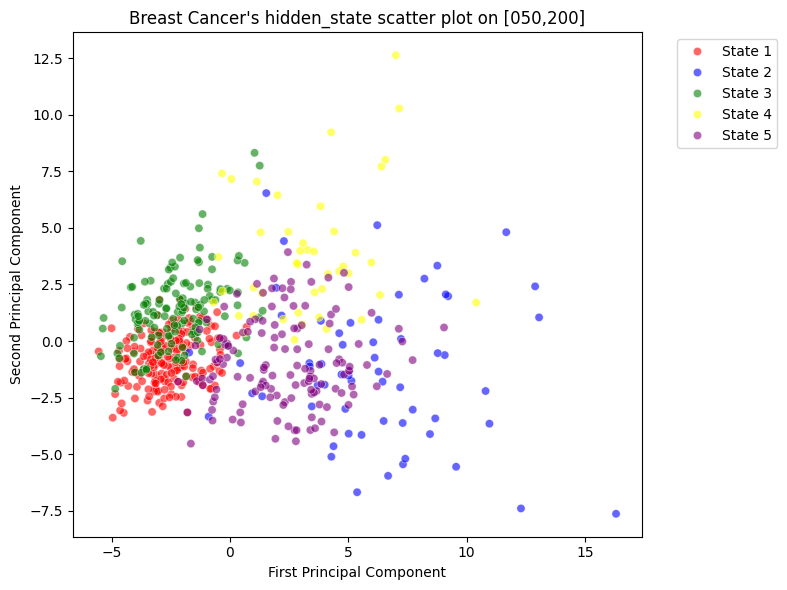

plotting 050,300:
Rename dictionary: {0: 'State 4', 1: 'State 1', 2: 'State 3', 3: 'State 2', 4: 'State 5'}


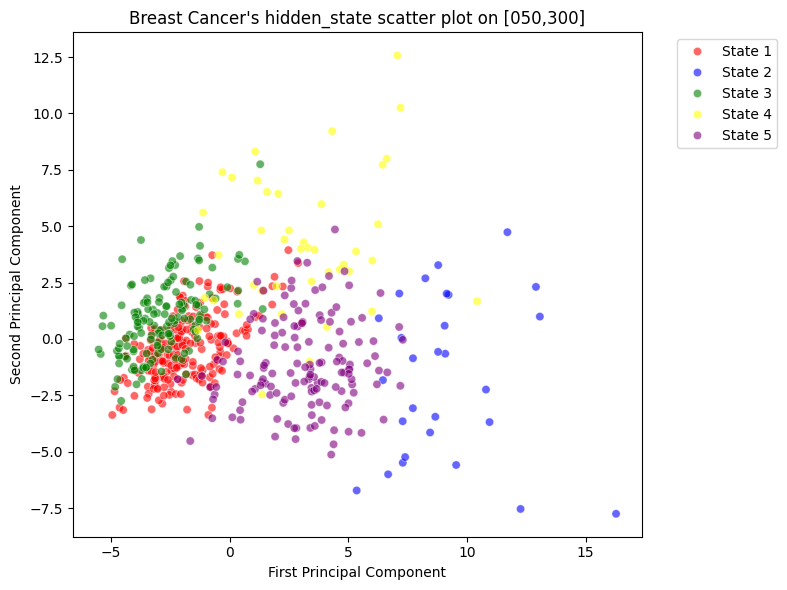

plotting 050,400:
Rename dictionary: {0: 'State 2', 1: 'State 5', 2: 'State 1', 3: 'State 3', 4: 'State 4'}


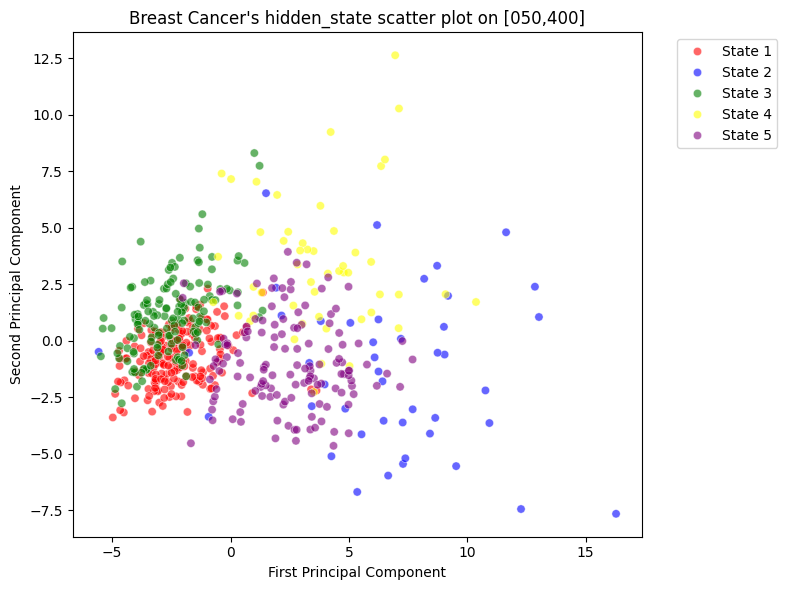

In [16]:
#plotting the scatter 
for key, value in merge_BC.items():

    print(f"plotting {key}:")
    
    plotting_trajectory(single_dataframe(value),target_col="hidden",
                        title=f"Breast Cancer's hidden_state scatter plot on [{key}]",
                        colors = ["red", "blue", "green","yellow","purple"], rename_order= BC_order[key])

In [17]:
# Checking on each hidden states match with the diag
BC_checkstat = check_state(merge_BC,"hidden","Diag", order = BC_order)
BC_checkstat

 counting 030,200:
The data at 030,200 has shape (570, 32)
 counting 030,300:
The data at 030,300 has shape (573, 32)
 counting 030,400:
The data at 030,400 has shape (570, 32)
 counting 040,200:
The data at 040,200 has shape (571, 32)
 counting 040,300:
The data at 040,300 has shape (570, 32)
 counting 040,400:
The data at 040,400 has shape (575, 32)
 counting 050,200:
The data at 050,200 has shape (575, 32)
 counting 050,300:
The data at 050,300 has shape (580, 32)
 counting 050,400:
The data at 050,400 has shape (570, 32)


{'030,200': Diag    0   1  Total
 1     202  26    228
 2       0  30     30
 3     136   5    141
 4      18  61     79
 5       2  90     92,
 '030,300': Diag    0    1  Total
 1     239   10    249
 2       0   25     25
 3      84   12     96
 4      33   52     85
 5       3  115    118,
 '030,400': Diag    0    1  Total
 1     166   17    183
 2       0   26     26
 3     160    2    162
 4      24   24     48
 5       7  144    151,
 '040,200': Diag    0    1  Total
 1     223    4    227
 2       4   53     57
 3      99    3    102
 4      17   19     36
 5      16  133    149,
 '040,300': Diag    0    1  Total
 1      72   42    114
 2       0   27     27
 3     245    4    249
 4      19   29     48
 5      22  110    132,
 '040,400': Diag    0    1  Total
 1     233    5    238
 2       3   25     28
 3      99    7    106
 4      12   39     51
 5      14  138    152,
 '050,200': Diag    0    1  Total
 1     188    8    196
 2       4   55     59
 3     135    4    139
 4 

In [18]:
save_dict_dataframes_to_excel(BC_checkstat,"0_BC_hidden_state_matching.xlsx")

DataFrames have been saved to 0_BC_hidden_state_matching.xlsx


In [19]:
BC_align_matrix = transitional_matrix(BC_model, "BC_model_transitional_matrix.txt",BC_order)
BC_align_matrix

{'030,200': array([[0.593, 0.069, 0.086, 0.238, 0.014],
        [0.136, 0.55 , 0.131, 0.046, 0.136],
        [0.225, 0.186, 0.386, 0.095, 0.108],
        [0.401, 0.038, 0.073, 0.475, 0.013],
        [0.066, 0.383, 0.263, 0.019, 0.268]]),
 '030,300': array([[0.658, 0.007, 0.164, 0.095, 0.076],
        [0.032, 0.302, 0.053, 0.177, 0.436],
        [0.423, 0.019, 0.333, 0.129, 0.096],
        [0.238, 0.046, 0.131, 0.362, 0.224],
        [0.126, 0.112, 0.063, 0.14 , 0.559]]),
 '030,400': array([[0.519, 0.01 , 0.283, 0.049, 0.139],
        [0.037, 0.298, 0.011, 0.089, 0.565],
        [0.313, 0.01 , 0.53 , 0.072, 0.076],
        [0.16 , 0.051, 0.218, 0.293, 0.279],
        [0.145, 0.11 , 0.054, 0.077, 0.614]]),
 '040,200': array([[0.262, 0.132, 0.128, 0.353, 0.124],
        [0.097, 0.41 , 0.045, 0.402, 0.045],
        [0.048, 0.028, 0.435, 0.072, 0.417],
        [0.073, 0.169, 0.049, 0.547, 0.161],
        [0.032, 0.025, 0.188, 0.122, 0.633]]),
 '040,300': array([[0.706, 0.035, 0.143, 0.012, 

In [20]:
abs_diff_BC = abs_diff_matrix_dict(BC_align_matrix,BC_paper_transitional_matrix)

030,200: 4.361
030,300: 4.221
030,400: 4.03
040,200: 4.351
040,300: 4.387
040,400: 4.196
050,200: 3.987
050,300: 3.783
050,400: 4.184


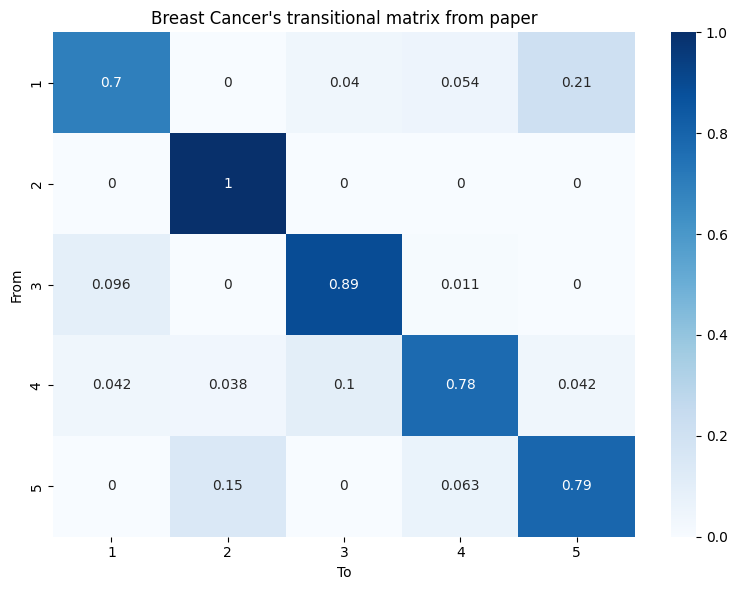

In [21]:
plot_transitional_matrix(BC_paper_transitional_matrix, title = "Breast Cancer's transitional matrix from paper")

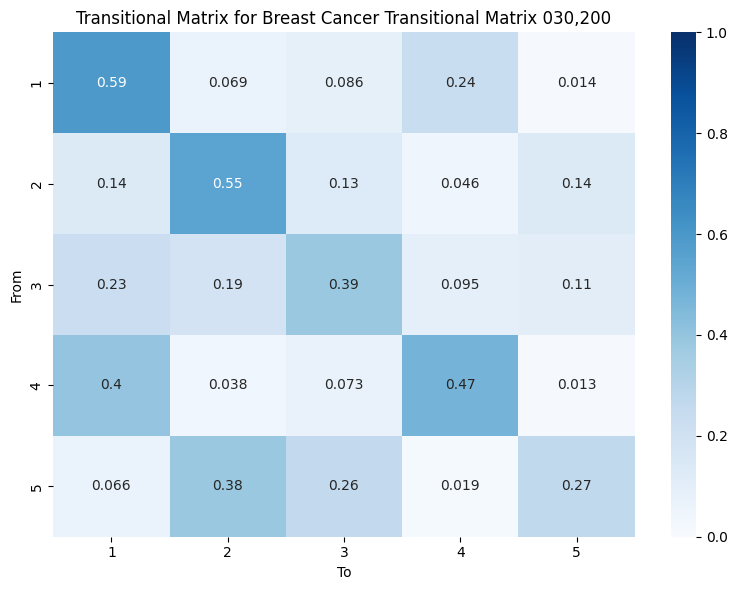

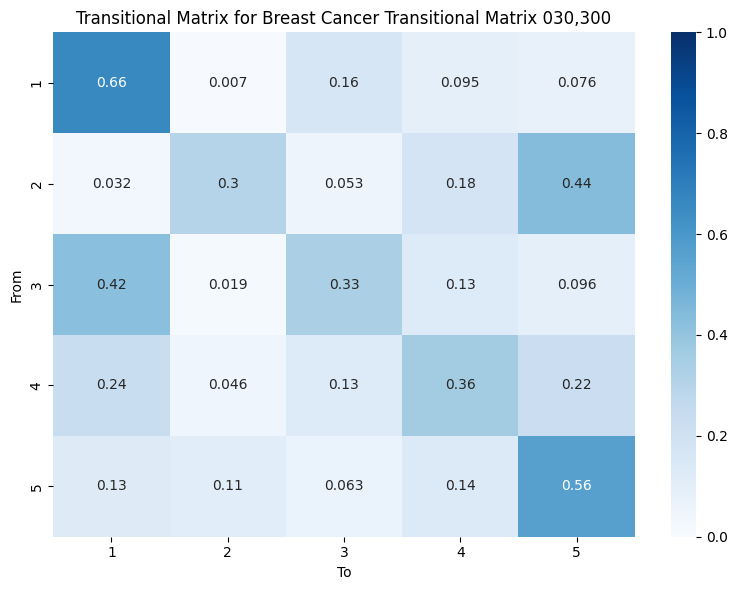

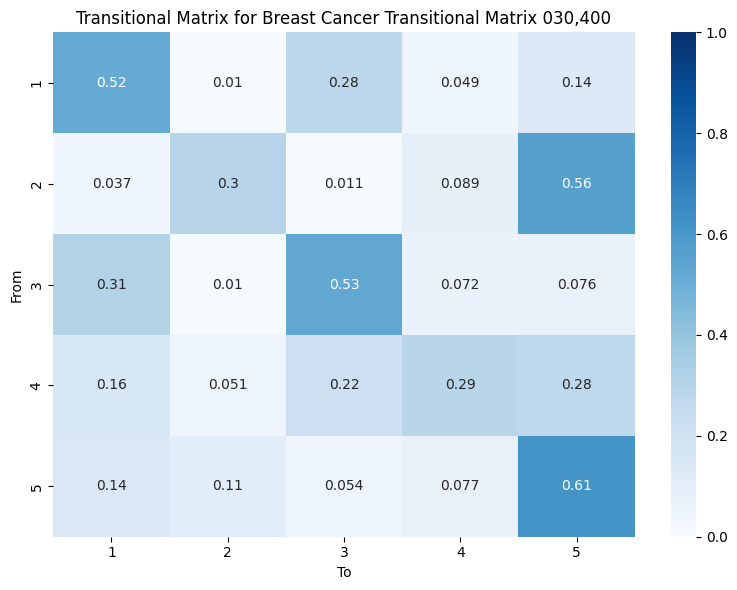

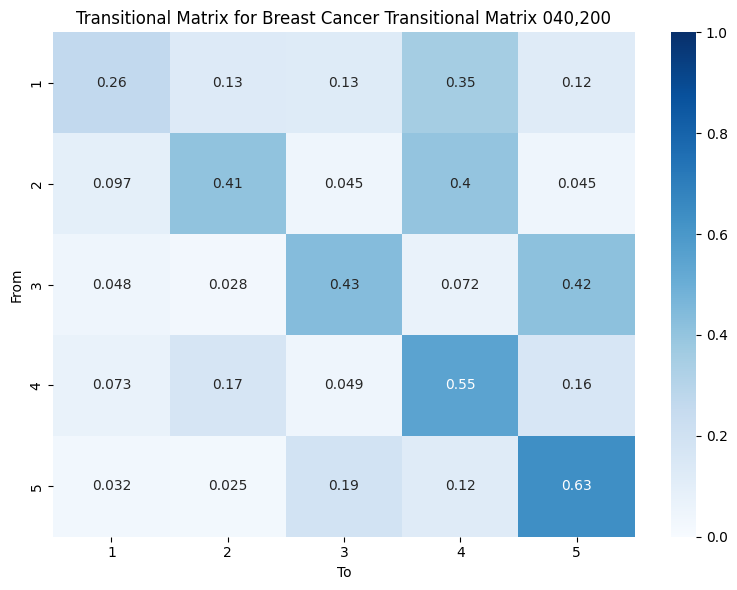

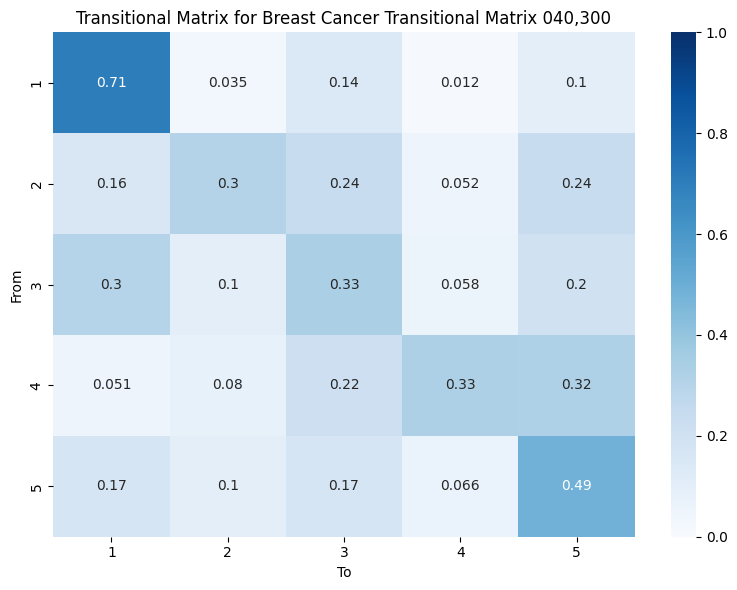

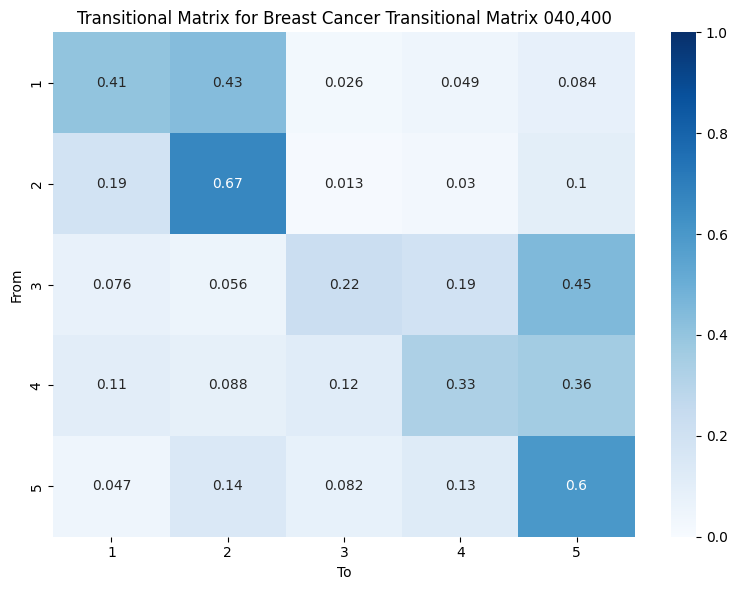

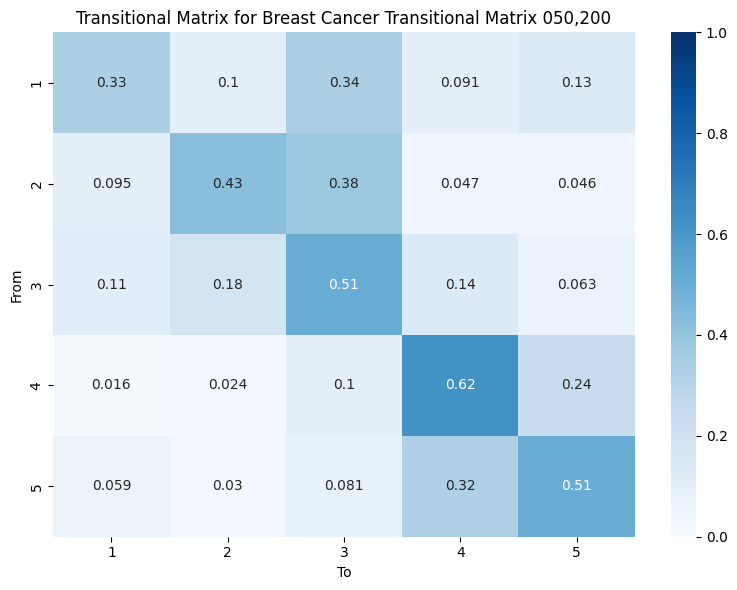

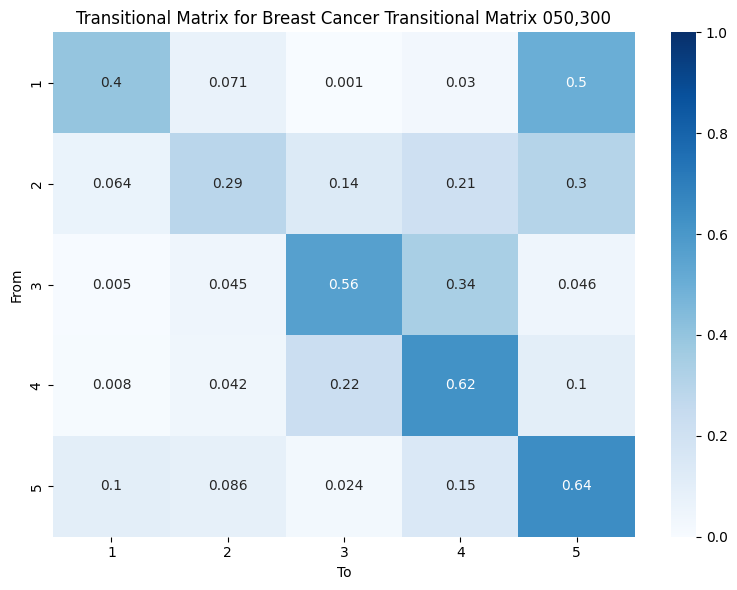

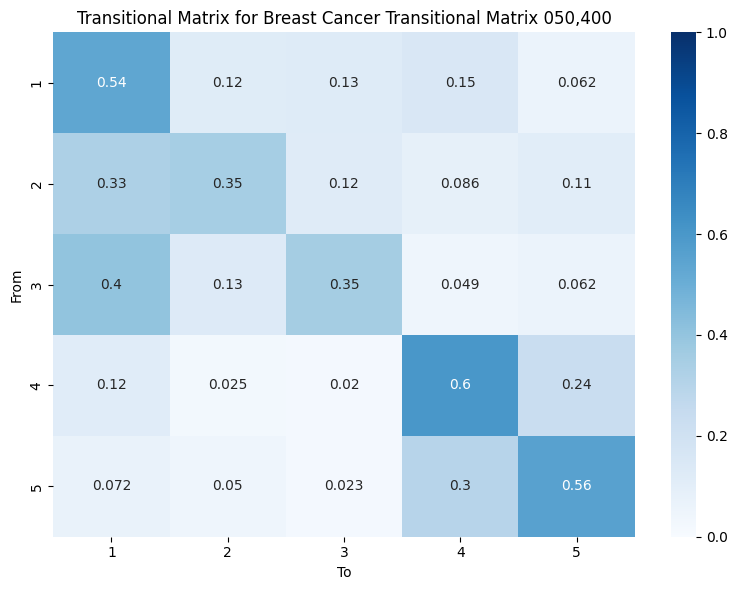

In [22]:
plot_transitional_matrix_dict(BC_align_matrix,"Breast Cancer Transitional Matrix")

In [23]:
# generating new data

gen_BC= gen_multi_ts(BC_model,obs_BC_col)

split_gen_BC_1, split_gen_BC_2 = split_dataframes(gen_BC,3)

---
# visualise the data

In [24]:
describe_BC = {}

for name, value in single_dataframe_dict(gen_BC).items():
    dataframe = value.drop_duplicates(keep = "last")
    dataframe = dataframe.value_counts("hidden").sort_index()
    dataframe.index = BC_order[name]
    dataframe = dataframe.sort_index()
    describe_BC[name] = dataframe
    print(f"{name}: \n{dataframe}")


030,200: 
1    2257
2     410
3    1304
4     925
5    1104
Name: count, dtype: int64
030,300: 
1    3692
2     493
3    1444
4    1393
5    1978
Name: count, dtype: int64
030,400: 
1    3662
2     663
3    3416
4    1014
5    3245
Name: count, dtype: int64
040,200: 
1    3002
2     868
3    1396
4     565
5    2169
Name: count, dtype: int64
040,300: 
1    2415
2     657
3    5096
4    1065
5    2767
Name: count, dtype: int64
040,400: 
1    6608
2     887
3    2783
4    1492
5    4230
Name: count, dtype: int64
050,200: 
1    3370
2    1090
3    2345
4     796
5    2399
Name: count, dtype: int64
050,300: 
1    5612
2     835
3    3615
4    1099
5    3839
Name: count, dtype: int64
050,400: 
1    6597
2    1597
3    4913
4    1868
5    5025
Name: count, dtype: int64


In [25]:
gen_BC_model,gen_BC_hidden = train_hmm_dict("gen_BC_data", split_gen_BC_1,5,42,1000,  hidden_columns_name = "New_hidden")

Now start training data gen_BC_data: 030,200
Training End!
Now start training data gen_BC_data: 030,300
Training End!
Now start training data gen_BC_data: 030,400
Training End!
Now start training data gen_BC_data: 040,200
Training End!
Now start training data gen_BC_data: 040,300
Training End!
Now start training data gen_BC_data: 040,400
Training End!
Now start training data gen_BC_data: 050,200
Training End!
Now start training data gen_BC_data: 050,300
Training End!
Now start training data gen_BC_data: 050,400
Training End!


In [26]:
for key, value in gen_BC_model.items():
    with open(f"gen_BC[{key}].pkl", "wb") as file:
        pickle.dump(value, file)

In [27]:
gen_BC_from_pickle = {}
for key, value in gen_BC_model.items():
    with open(f"gen_BC[{key}].pkl", 'rb') as file:
        gen_BC_from_pickle[key] = pickle.load(file)

In [28]:
gen_BC_merge_single = single_dataframe_dict(merging_dict(gen_BC,gen_BC_hidden))

In [29]:
gen_BC_confusion_matrix = {}
for key, value in gen_BC_merge_single.items():
    gen_BC_confusion_matrix[key] = create_confusion_matrix(value,"hidden", "New_hidden", rename_order=BC_order[key])
    print(key)
    print(gen_BC_confusion_matrix[key])

030,200
     1     2     3     4    5
1    0    10  2246     1    0
2    0     0     0     0  410
3    0  1286    18     0    0
4  923     0     1     1    0
5    0     0     0  1104    0
030,300
      1     2     3    4     5
1     2     3  3686    0     1
2     0     0     0  493     0
3  1440     1     3    0     0
4     1  1387     2    0     3
5     0     4     5    1  1968
030,400
      1     2     3    4     5
1    11    33     0    0  3618
2     0     0     0  663     0
3     0  3367     0    0    49
4     1     1  1012    0     0
5  3234     1     1    0     9
040,200
      1    2     3    4     5
1  2986    0     3    0    13
2     0    0     3  865     0
3    29    0     1    0  1366
4     0  565     0    0     0
5     6    1  2161    1     0
040,300
      1     2     3    4     5
1     1    12     8    0  2394
2     0     0     0  657     0
3     0  5090     1    0     5
4  1063     0     1    0     1
5     0    10  2754    0     3
040,400
     1     2     3     4     5
1  

In [30]:
gen_BC_order = {
    "030,200": [3, 5, 2, 1, 4],
    "030,300": [3, 4, 1, 2, 5],
    "030,400": [5, 4, 2, 3, 1],
    "040,200": [1, 4, 5, 2, 3],
    "040,300": [1, 3, 2, 4, 5],
    "040,400": [2, 1, 4, 3, 5],
    "050,200": [1, 4, 3, 2, 5],
    "050,300": [2, 4, 5, 3, 1],
    "050,400": [2, 4, 3, 5, 1]
}

In [31]:
gen_BC_matrix = transitional_matrix(gen_BC_model,  "0_gen_BC_tran_matrix.txt", order_dict=gen_BC_order)

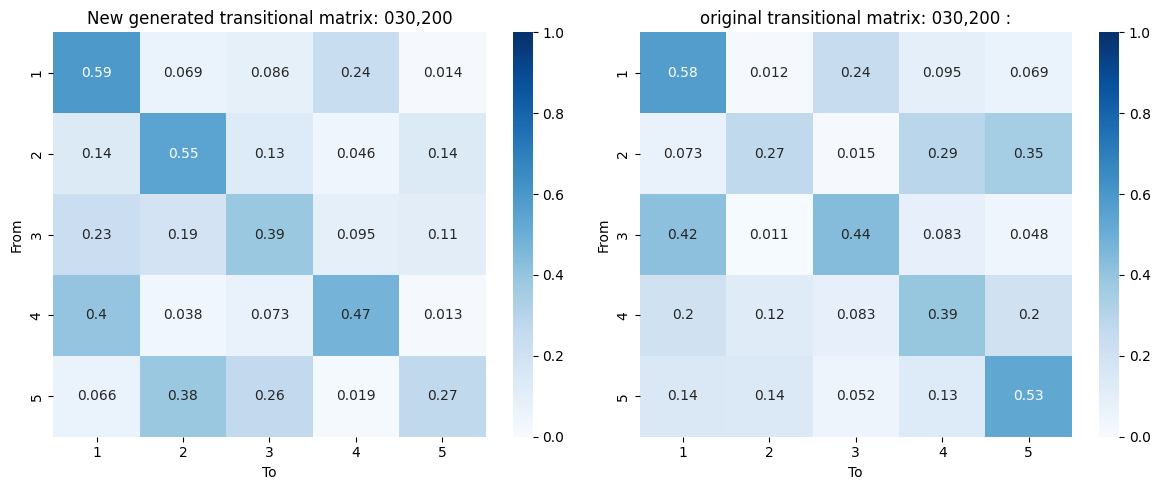

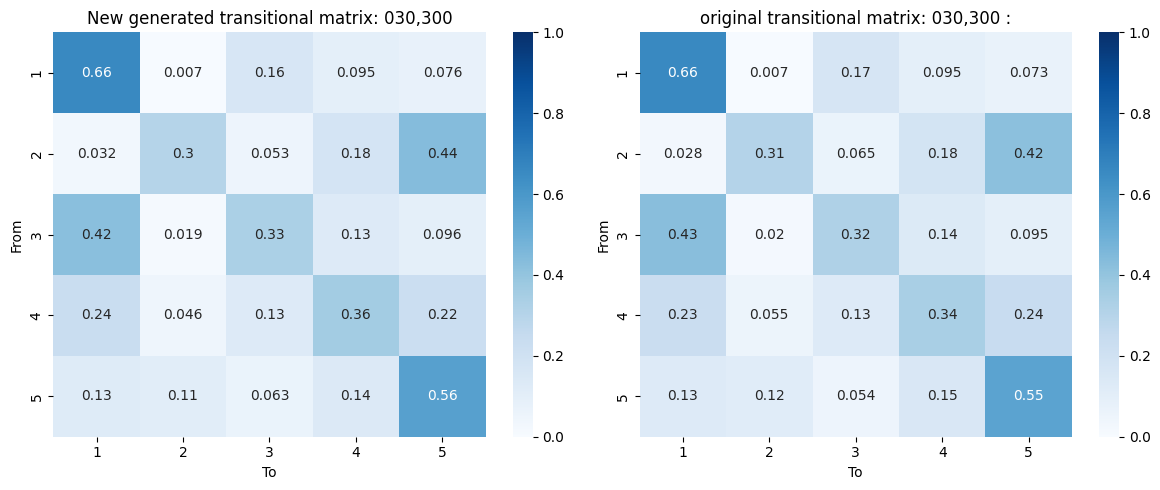

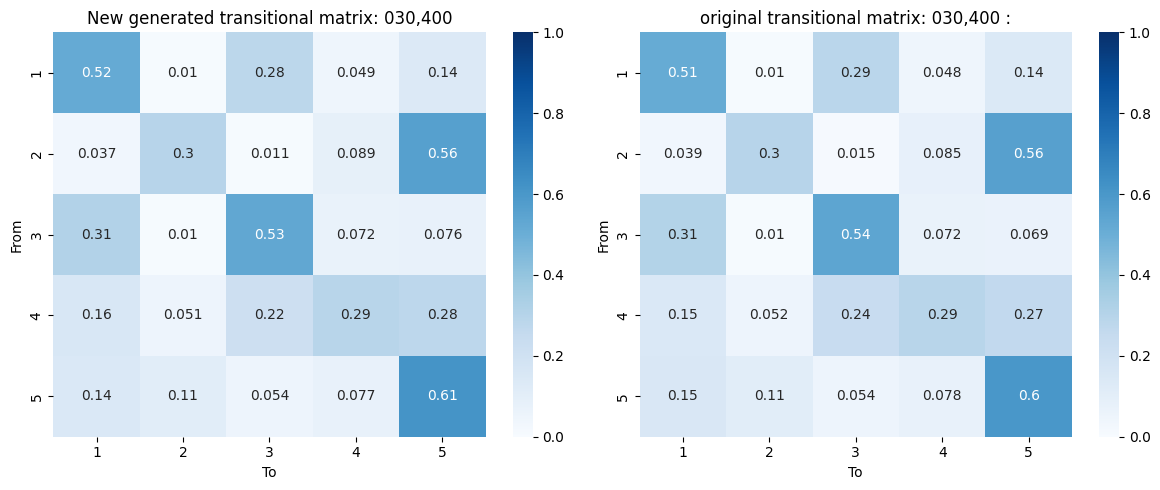

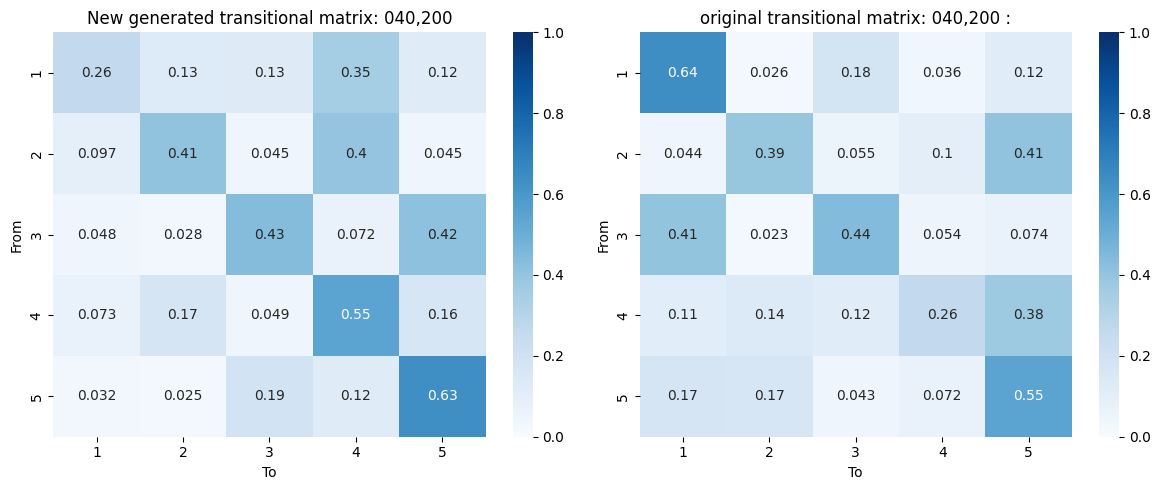

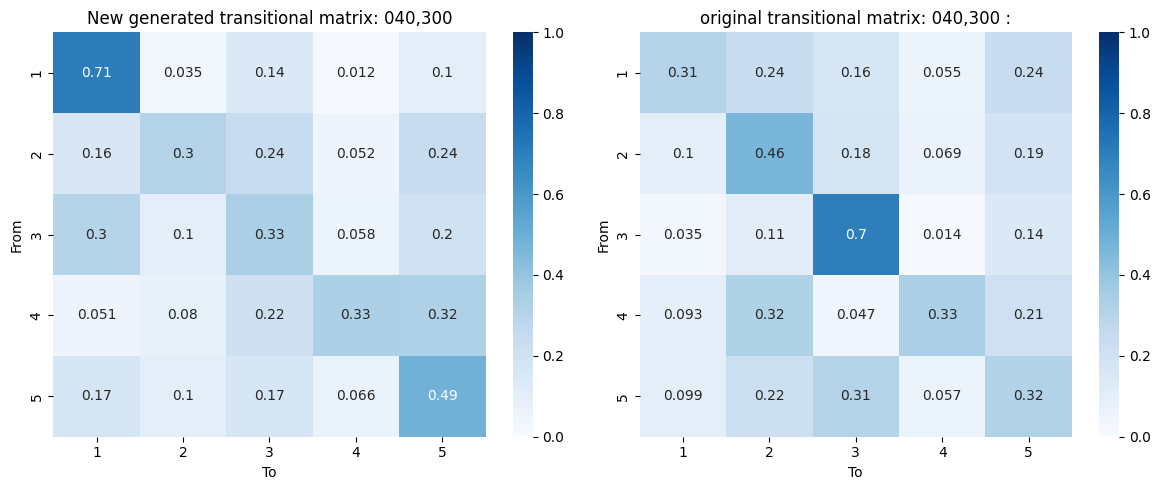

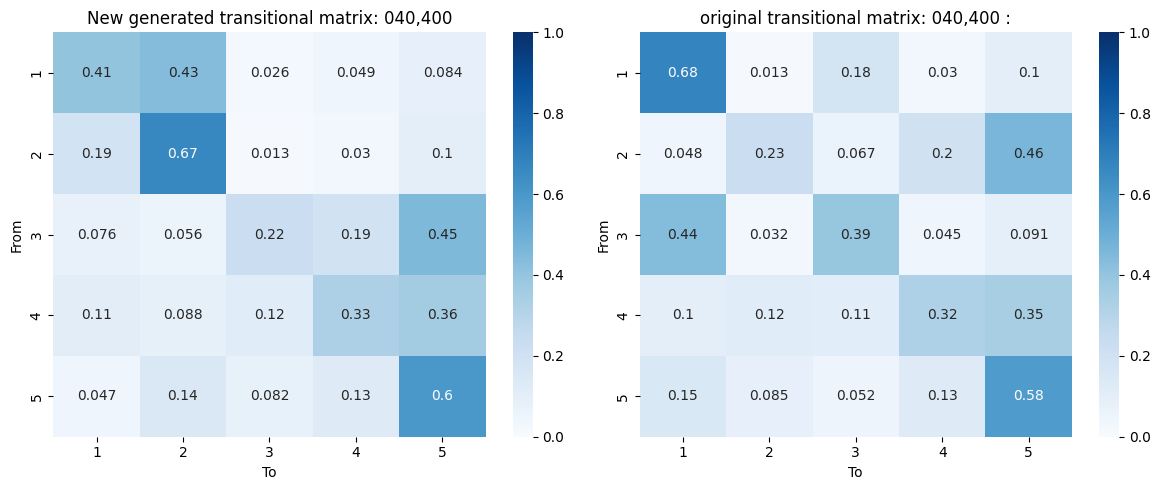

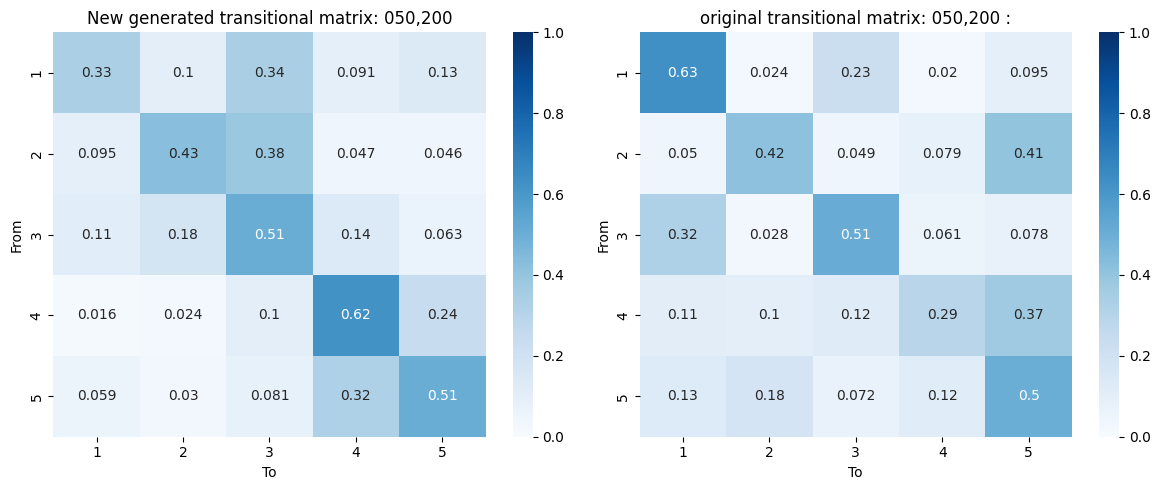

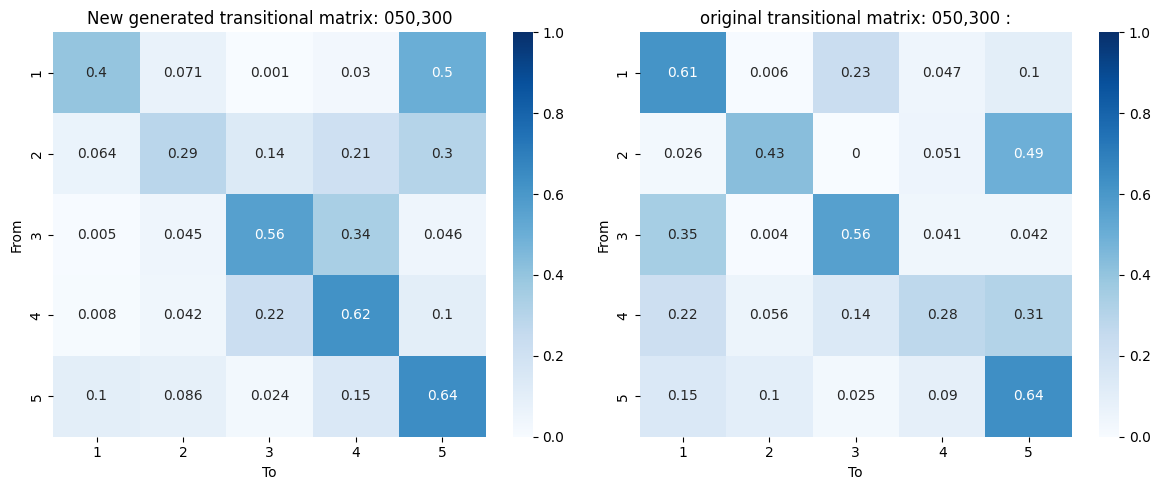

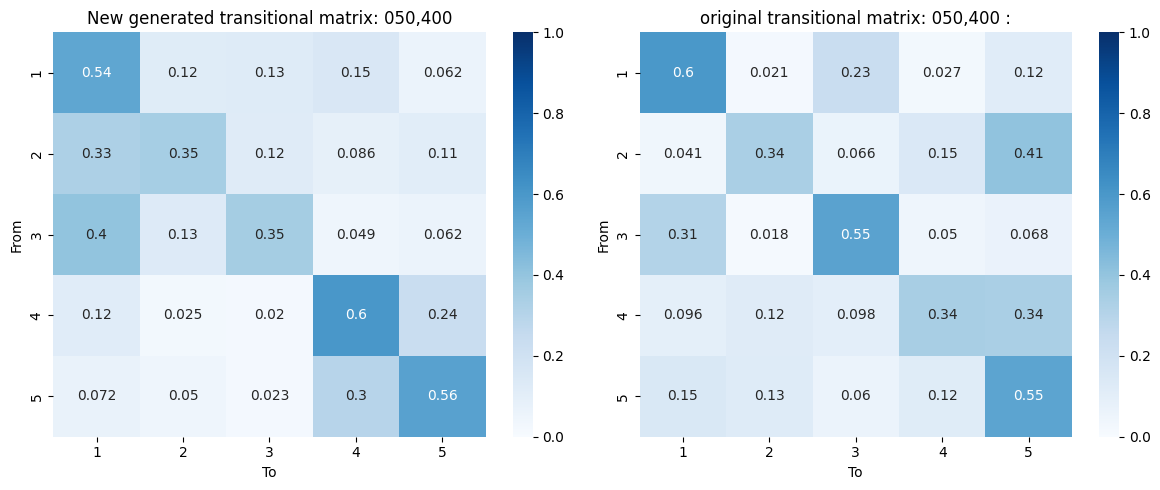

In [32]:
compare_matrices_dict(BC_align_matrix, gen_BC_matrix, title = "New generated transitional matrix", compare_title ="original transitional matrix")

In [33]:
gen_BC_destand = destandardise(split_gen_BC_1,X_BC_mean,X_BC_sd)

In [34]:
#Train a classifier
BC_classifier, BC_scaler, BC_accuracy, BC_classifier_name = compare_classifiers(X_BC, y_BC, "Breast Cancer")

/Users/ezra/Library/CloudStorage/OneDrive-Birkbeck,UniversityofLondon/0_Birkbeck/MSc Project/0_Project/MScProject/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ezra/Library/CloudStorage/OneDrive-Birkbeck,UniversityofLondon/0_Birkbeck/MSc Project/0_Project/MScProject/.venv/lib/python3.12/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



For Breast Cancer - Logistic Regression:
Accuracy: 0.9737
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


For Breast Cancer - Decision Tree:
Accuracy: 0.9474
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


For Breast Cancer - Random Forest:
Accuracy: 0.9649
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
   

/Users/ezra/Library/CloudStorage/OneDrive-Birkbeck,UniversityofLondon/0_Birkbeck/MSc Project/0_Project/MScProject/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ezra/Library/CloudStorage/OneDrive-Birkbeck,UniversityofLondon/0_Birkbeck/MSc Project/0_Project/MScProject/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
# Predict the generated data diseases states

gen_BC_pred_diag = disease_prediction(gen_BC_destand,BC_classifier,BC_scaler,"Diag")

merge_gen_BC = merging_dict(gen_BC_destand,gen_BC_pred_diag,split_gen_BC_2)

In [36]:
gen_BC_checkstat = check_state(merge_gen_BC,"hidden","Diag")
save_dict_dataframes_to_excel(gen_BC_checkstat,"0_gen_BC_hidden_state_matching.xlsx")

 counting 030,200:
The data at 030,200 has shape (6000, 34)
 counting 030,300:
The data at 030,300 has shape (9000, 34)
 counting 030,400:
The data at 030,400 has shape (12000, 34)
 counting 040,200:
The data at 040,200 has shape (8000, 34)
 counting 040,300:
The data at 040,300 has shape (12000, 34)
 counting 040,400:
The data at 040,400 has shape (16000, 34)
 counting 050,200:
The data at 050,200 has shape (10000, 34)
 counting 050,300:
The data at 050,300 has shape (15000, 34)
 counting 050,400:
The data at 050,400 has shape (20000, 34)
DataFrames have been saved to 0_gen_BC_hidden_state_matching.xlsx


In [37]:
gen_BC_CS = cross_sectional(merge_gen_BC,500)

In [38]:
#take a look on the cross-sectional data
gen_BC_CS["030,200"]

radius1   texture1  perimeter1       area1  smoothness1  compactness1  \
0    10.838959  20.455065   73.577335  374.774833     0.108118      0.078845   
1    11.173479  17.453081   69.410847  402.433707     0.085745      0.073952   
2    10.990415  20.075885   70.002057  411.097205     0.116461      0.132460   
3    15.104711  16.289056   97.664199  728.696723     0.109649      0.115892   
4    11.028766  25.577324   73.805870  394.394069     0.078816      0.095076   
..         ...        ...         ...         ...          ...           ...   
495  12.585815  12.479934   82.777236  535.503091     0.105897      0.086071   
496   8.828631  13.942616   57.465479  201.270716     0.106997      0.090973   
497  11.672443  16.769138   73.897188  490.535190     0.085892      0.038733   
498  11.461953  21.391067   75.309886  388.446006     0.092803      0.060203   
499  11.808031  13.058566   75.612139  455.017370     0.094682      0.058712   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  \
0      0.024951         0.028219   0.199643            0.071081  ...   
1      0.025122         0.010591   0.202694            0.063995  ...   
2      0.059811         0.036779   0.178611            0.069949  ...   
3      0.057553         0.050417   0.147865            0.068130  ...   
4      0.054967         0.022696   0.162010            0.065445  ...   
..          ...              ...        ...                 ...  ...   
495    0.054686         0.047349   0.192727            0.059815  ...   
496    0.047777         0.005604   0.179391            0.069091  ...   
497    0.048914         0.012800   0.163109            0.058968  ...   
498    0.035231         0.013683   0.188646            0.059163  ...   
499    0.023880         0.013884   0.167020            0.068309  ...   

     compactness3  concavity3  concave_points3  symmetry3  fractal_dimension3  \
0        0.138143    0.062179         0.046680   0.242300            0.079685   
1        0.194627    0.189003         0.083916   0.374155            0.080214   
2        0.271339    0.161108         0.093138   0.305205            0.084888   
3        0.219411    0.170796         0.109803   0.192001            0.087040   
4        0.263479    0.156450         0.061330   0.329687            0.087893   
..            ...         ...              ...        ...                 ...   
495      0.212064    0.241624         0.149890   0.308218            0.070602   
496      0.244251    0.200704         0.084176   0.316377            0.090162   
497      0.185873    0.238343         0.056451   0.267013            0.079648   
498      0.145263    0.184270         0.064805   0.320981            0.073211   
499      0.094273    0.102671         0.049815   0.256338            0.079053   

     Diag  series_id  time_step  hidden  source_df  
0       0          0         27       4          0  
1       0          0         15       0          0  
2       0          0         23       4          0  
3       0          1          0       0          1  
4       0          1          5       4          1  
..    ...        ...        ...     ...        ...  
495     0        197         28       0        197  
496     0        198          3       4        198  
497     0        198         19       0        198  
498     0        199         21       0        199  
499     0        199         12       4        199  

[500 rows x 35 columns]

In [39]:
gen_BC_CS_split1,gen_BC_CS_split2 = split_dataframes(gen_BC_CS,5)

In [40]:
gen_BC_CS_standardised, gen_BC_CS_mean, gen_BC_CS_sd = standardise_multiple_dataset(gen_BC_CS_split1)

In [41]:
pd.DataFrame(gen_BC_CS_mean) # have a look on the mean value of each dataset

030,200     030,300     030,400     040,200  \
radius1              14.356923   14.466758   13.897314   13.824032   
texture1             19.423923   19.538085   19.100557   19.554029   
perimeter1           93.738577   94.505321   90.246903   89.958671   
area1               675.395804  687.167084  631.954609  627.179574   
smoothness1           0.097670    0.097126    0.095423    0.096316   
compactness1          0.111167    0.110310    0.102290    0.100540   
concavity1            0.100503    0.098010    0.085355    0.082703   
concave_points1       0.054384    0.053062    0.046090    0.046003   
symmetry1             0.183235    0.182411    0.179579    0.181487   
fractal_dimension1    0.063407    0.063168    0.062697    0.062669   
radius2               0.447605    0.437286    0.392084    0.389232   
texture2              1.249370    1.261886    1.215340    1.241986   
perimeter2            3.169250    3.153543    2.777207    2.747071   
area2                45.262392   44.699029   37.370503   38.012178   
smoothness2           0.007235    0.007299    0.007091    0.007087   
compactness2          0.027505    0.027488    0.025640    0.024493   
concavity2            0.035316    0.034247    0.032712    0.030022   
concave_points2       0.012898    0.012494    0.011779    0.011501   
symmetry2             0.021407    0.021072    0.020627    0.020574   
fractal_dimension2    0.003992    0.003980    0.003885    0.003631   
radius3              16.665521   16.674151   15.965194   15.929791   
texture3             25.802126   26.001736   25.401198   26.018164   
perimeter3          110.598336  110.816753  105.093694  104.785358   
area3               925.109938  927.148342  841.078823  842.753678   
smoothness3           0.133814    0.133861    0.131102    0.133099   
compactness3          0.268580    0.267681    0.247588    0.245162   
concavity3            0.298394    0.290760    0.269131    0.256932   
concave_points3       0.122471    0.121737    0.110915    0.110575   
symmetry3             0.294164    0.291416    0.287886    0.291041   
fractal_dimension3    0.084891    0.085049    0.083814    0.083369   

                       040,300     040,400     050,200     050,300     050,400  
radius1              14.215580   14.249582   14.537320   14.037591   14.360370  
texture1             19.270682   19.068269   19.311327   19.124084   19.171985  
perimeter1           92.752930   92.960269   94.474555   91.340915   93.490730  
area1               661.807707  668.639094  688.431103  646.526283  676.616122  
smoothness1           0.097521    0.097898    0.096858    0.096814    0.096508  
compactness1          0.106656    0.108450    0.108130    0.103255    0.104868  
concavity1            0.092003    0.093889    0.094511    0.087619    0.090657  
concave_points1       0.050600    0.052120    0.051474    0.048284    0.050771  
symmetry1             0.181542    0.182186    0.182192    0.180681    0.179522  
fractal_dimension1    0.062922    0.063179    0.062697    0.062817    0.062504  
radius2               0.401101    0.407774    0.423308    0.401451    0.417035  
texture2              1.213345    1.175338    1.200882    1.215119    1.195491  
perimeter2            2.873331    2.907864    2.990497    2.843082    2.935281  
area2                39.964450   40.953828   44.207805   39.437193   42.677599  
smoothness2           0.006989    0.007267    0.006856    0.007262    0.007045  
compactness2          0.026223    0.026008    0.025749    0.025734    0.025775  
concavity2            0.033232    0.032074    0.032343    0.032269    0.032537  
concave_points2       0.012185    0.012085    0.011848    0.011845    0.011979  
symmetry2             0.020219    0.020721    0.020578    0.020409    0.020290  
fractal_dimension2    0.003786    0.003811    0.003851    0.003824    0.003755  
radius3              16.373807   16.445676   16.747056   16.116112   16.545043  
texture3             25.755014   25.243190   25.649383   25.467684   2

In [42]:
pd.DataFrame(gen_BC_CS_sd) # have a look on the sd of each dataset

030,200     030,300     030,400     040,200  \
radius1               3.639481    3.650208    3.380109    3.518801   
texture1              4.238295    4.265019    4.233209    4.380429   
perimeter1           25.122959   25.281775   23.281335   24.240260   
area1               360.414659  369.014620  328.417639  343.328678   
smoothness1           0.013752    0.014361    0.013937    0.014665   
compactness1          0.056786    0.055638    0.050243    0.050604   
concavity1            0.083950    0.087231    0.073231    0.074858   
concave_points1       0.039903    0.041287    0.035669    0.037101   
symmetry1             0.027827    0.028213    0.027221    0.027247   
fractal_dimension1    0.007521    0.006664    0.007112    0.006937   
radius2               0.294160    0.307905    0.255134    0.251654   
texture2              0.549599    0.564414    0.580555    0.564701   
perimeter2            2.243898    2.340389    1.896980    1.820922   
area2                48.494376   50.485454   38.729192   40.557032   
smoothness2           0.002955    0.003198    0.003128    0.002976   
compactness2          0.019764    0.019321    0.018861    0.017504   
concavity2            0.032725    0.033885    0.032648    0.031219   
concave_points2       0.006462    0.006651    0.006488    0.006347   
symmetry2             0.008525    0.008585    0.009074    0.008148   
fractal_dimension2    0.002682    0.002537    0.002881    0.002501   
radius3               4.995935    4.994602    4.629026    4.770669   
texture3              6.090354    6.079459    6.022834    6.364646   
perimeter3           35.123538   35.089086   31.643871   32.962977   
area3               589.199139  583.059408  528.550518  556.595888   
smoothness3           0.023059    0.022924    0.022550    0.024459   
compactness3          0.169279    0.165771    0.150730    0.155027   
concavity3            0.226851    0.221451    0.207283    0.208678   
concave_points3       0.068760    0.068220    0.062019    0.065347   
symmetry3             0.064448    0.062897    0.062870    0.060597   
fractal_dimension3    0.019934    0.017813    0.018173    0.018662   

                       040,300     040,400     050,200     050,300     050,400  
radius1               3.411772    3.578055    3.650480    3.654933    3.752972  
texture1              4.062064    4.480275    4.245786    4.315518    4.273524  
perimeter1           23.218317   24.866524   25.314461   25.144511   26.069698  
area1               341.923286  361.201181  375.874138  370.810362  376.730485  
smoothness1           0.013019    0.014563    0.013810    0.014328    0.014445  
compactness1          0.050404    0.057577    0.053475    0.052002    0.053972  
concavity1            0.074073    0.087197    0.082503    0.078010    0.081550  
concave_points1       0.036178    0.041093    0.039745    0.038396    0.041211  
symmetry1             0.026774    0.028600    0.027680    0.026086    0.026481  
fractal_dimension1    0.007032    0.007222    0.006976    0.007090    0.006819  
radius2               0.282040    0.270763    0.312596    0.279313    0.303542  
texture2              0.529936    0.569356    0.565997    0.576333    0.565295  
perimeter2            2.033834    1.954040    2.241494    2.012327    2.191510  
area2                46.913966   44.414353   53.669083   46.681048   47.860279  
smoothness2           0.003081    0.003096    0.002792    0.003003    0.002927  
compactness2          0.017722    0.018362    0.017696    0.017945    0.017846  
concavity2            0.029504    0.028446    0.029503    0.028717    0.029274  
concave_points2       0.005780    0.006255    0.005849    0.006003    0.006399  
symmetry2             0.008199    0.008507    0.008563    0.008427    0.008411  
fractal_dimension2    0.002610    0.002502    0.002597    0.002511    0.002445  
radius3               4.601274    4.824939    5.002912    4.999470    5.178324  
texture3              5.830714    6.283776    6.272100    6.049663    

In [43]:
gen_BC_PTS, gen_BC_PTS_path = multi_pseudo_time_series(length, no_ts, gen_BC_CS_standardised["030,200"],extract_specific_columns(gen_BC_CS_split2,"Diag")["030,200"], 42)

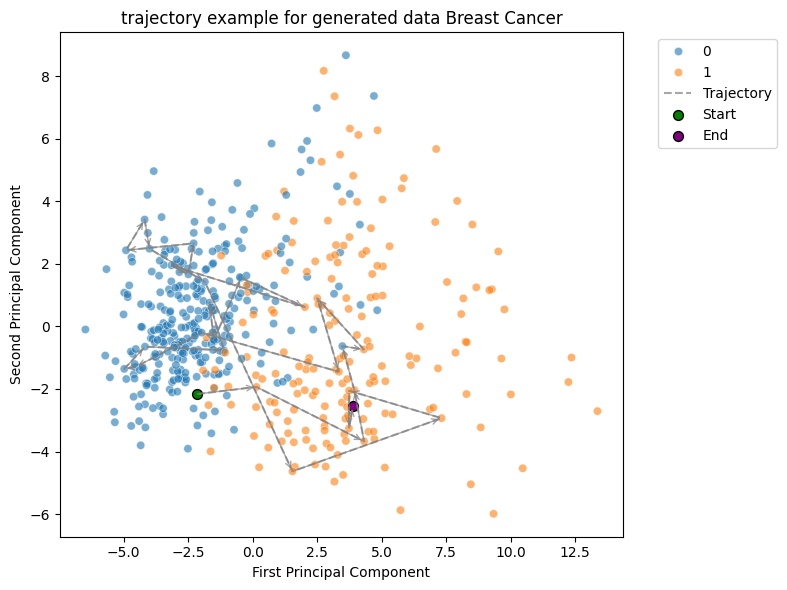

In [44]:
plotting_trajectory((gen_BC_CS_standardised["030,200"],extract_specific_columns(gen_BC_CS_split2,"Diag")["030,200"]),
                    target_col = "Diag",trajectory_indices=gen_BC_PTS_path["030,200"][random_no_BC],
                    title="trajectory example for generated data Breast Cancer")

In [45]:
gen_BC_PTS_split1, gen_BC_PTS_split2 = split_dataframes(gen_BC_PTS,1)


In [46]:
gen_BC_PTS_model, gen_BC_PTS_pred = train_hmm_dict("gen_BC_PTS_split1",gen_BC_PTS_split1,5,42,1000, hidden_columns_name = "CS_hidden")

Now start training data gen_BC_PTS_split1: 030,200
Training End!
Now start training data gen_BC_PTS_split1: 030,300
Training End!
Now start training data gen_BC_PTS_split1: 030,400
Training End!
Now start training data gen_BC_PTS_split1: 040,200
Training End!
Now start training data gen_BC_PTS_split1: 040,300
Training End!
Now start training data gen_BC_PTS_split1: 040,400
Training End!
Now start training data gen_BC_PTS_split1: 050,200
Training End!
Now start training data gen_BC_PTS_split1: 050,300
Training End!
Now start training data gen_BC_PTS_split1: 050,400
Training End!


In [47]:
for key, value in gen_BC_PTS_model.items():
    with open(f"gen_BC_PTS[{key}].pkl", "wb") as file:
        pickle.dump(value, file)

gen_BC_PTS_from_pickle = {}
for key, value in BC_model.items():
    with open(f"gen_BC_PTS[{key}].pkl", 'rb') as file:
        gen_BC_PTS_from_pickle[key] = pickle.load(file)

In [48]:
merge_gen_BC_PTS = merging_dict(gen_BC_PTS_split1,gen_BC_PTS_split2,gen_BC_PTS_pred)


In [49]:
merge_gen_BC_PTS_single = single_dataframe_dict(merge_gen_BC_PTS)

In [50]:
merge_gen_BC_PTS_single["030,200"]

radius1  texture1  perimeter1     area1  smoothness1  compactness1  \
0   -1.071352  0.635394   -1.030054 -1.004180     0.734117     -0.082906   
1   -0.790944 -0.451490   -0.808021 -0.652697    -0.747393      1.312333   
2   -0.677547  0.464228   -0.681148 -0.611268     0.077257     -0.600405   
3   -1.245429  1.238847   -1.382503 -0.887699    -1.658737     -0.664802   
4   -0.558521  1.189301   -0.453230 -0.586192     1.638847      0.773155   
..        ...       ...         ...       ...          ...           ...   
497  0.005243 -0.166668    0.128249  0.006767     1.172713      0.383031   
498  1.310672  0.151614    1.455411  1.512775     1.019265      0.047466   
499  1.703339 -0.076096    1.637628  1.935642     2.439238      1.565947   
500  1.267055  0.524181    1.425328  1.502461     0.799744      1.804944   
501  0.631220 -0.452237    0.691727  0.677810     0.027312      0.829509   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  \
0     -0.192478        -0.505504   0.079723            0.959402  ...   
1      0.081059        -0.332589   1.736909            1.609746  ...   
2     -0.788001        -0.534348  -0.079783           -0.157157  ...   
3     -0.766847        -1.051364   1.447083            0.364717  ...   
4     -0.154507        -0.336028   0.668443            2.073208  ...   
..          ...              ...        ...                 ...  ...   
497    0.791915         0.754109   1.476916            1.239123  ...   
498    0.602666         1.056077  -0.040503           -0.074861  ...   
499    1.644949         3.064861   1.160435            1.108792  ...   
500    1.679933         1.539778   2.084203            1.021991  ...   
501    2.448681         1.621180   1.526183            0.570081  ...   

     perimeter3     area3  smoothness3  compactness3  concavity3  \
0     -0.867389 -0.939805     0.525251     -0.312174   -0.041199   
1     -0.287818 -0.573967     0.155437      2.477890    2.103873   
2     -0.608257 -0.598052     0.571178     -0.432920   -0.522203   
3     -1.213619 -0.998111    -0.673634     -0.798278   -1.055205   
4     -0.533592 -0.807317     0.899940      0.230513   -0.604837   
..          ...       ...          ...           ...         ...   
497    0.744809  0.597484     1.179050     -0.028006    0.195139   
498    1.324012  1.473270     0.808518     -0.571642   -0.017127   
499    2.154806  2.454434     1.352565      0.369101    0.219601   
500    2.010375  1.959168     0.221553      0.830172    1.074032   
501    0.801110  0.642217    -0.631904     -0.166714    1.263026   

     concave_points3  symmetry3  fractal_dimension3  Diag  CS_hidden  
0          -0.402193  -0.222511            0.244412     0          1  
1           1.430980   2.304406            2.097292     1          2  
2          -0.122284  -0.280065           -0.203538     0          0  
3          -1.428551   0.227369           -0.392025     0          3  
4          -0.494569  -0.182549            0.891694     0          3  
..               ...        ...                 ...   ...        ...  
497         0.832949   1.885418            0.866736     1          2  
498         0.690507  -0.054057           -0.083731     1          1  
499         1.820003  -0.622273            0.635341     1          4  
500         1.798583   0.449043            1.089237     1          4  
501         1.175641   0.603231           -0.108301     1          2  

[502 rows x 32 columns]

In [51]:
gen_BC_PTS_checkstat = check_state(merge_gen_BC_PTS,"CS_hidden","Diag")

 counting 030,200:
The data at 030,200 has shape (502, 32)
 counting 030,300:
The data at 030,300 has shape (500, 32)
 counting 030,400:
The data at 030,400 has shape (502, 32)
 counting 040,200:
The data at 040,200 has shape (502, 32)
 counting 040,300:
The data at 040,300 has shape (502, 32)
 counting 040,400:
The data at 040,400 has shape (501, 32)
 counting 050,200:
The data at 050,200 has shape (500, 32)
 counting 050,300:
The data at 050,300 has shape (506, 32)
 counting 050,400:
The data at 050,400 has shape (501, 32)


Figure saved as generated_PTS_Breast_Cancer_030,200.png
Figure saved as generated_PTS_Breast_Cancer_030,300.png
Figure saved as generated_PTS_Breast_Cancer_030,400.png
Figure saved as generated_PTS_Breast_Cancer_040,200.png
Figure saved as generated_PTS_Breast_Cancer_040,300.png
Figure saved as generated_PTS_Breast_Cancer_040,400.png
Figure saved as generated_PTS_Breast_Cancer_050,200.png
Figure saved as generated_PTS_Breast_Cancer_050,300.png
Figure saved as generated_PTS_Breast_Cancer_050,400.png


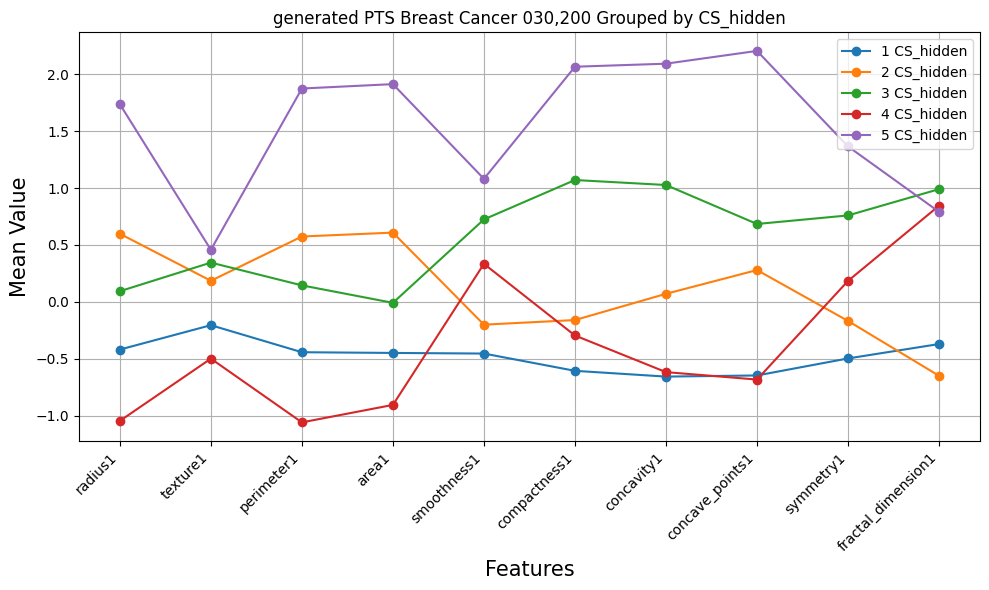

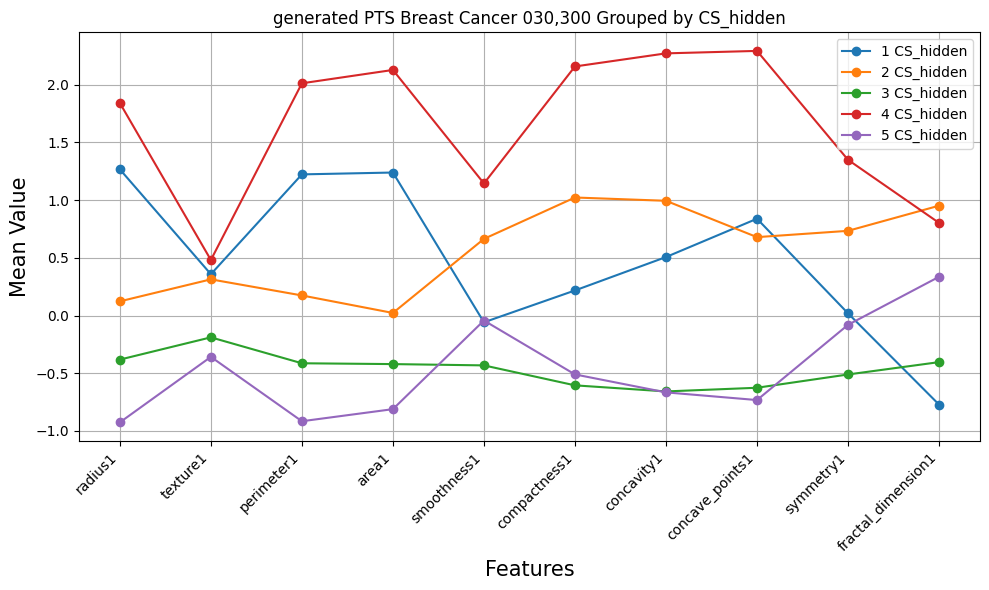

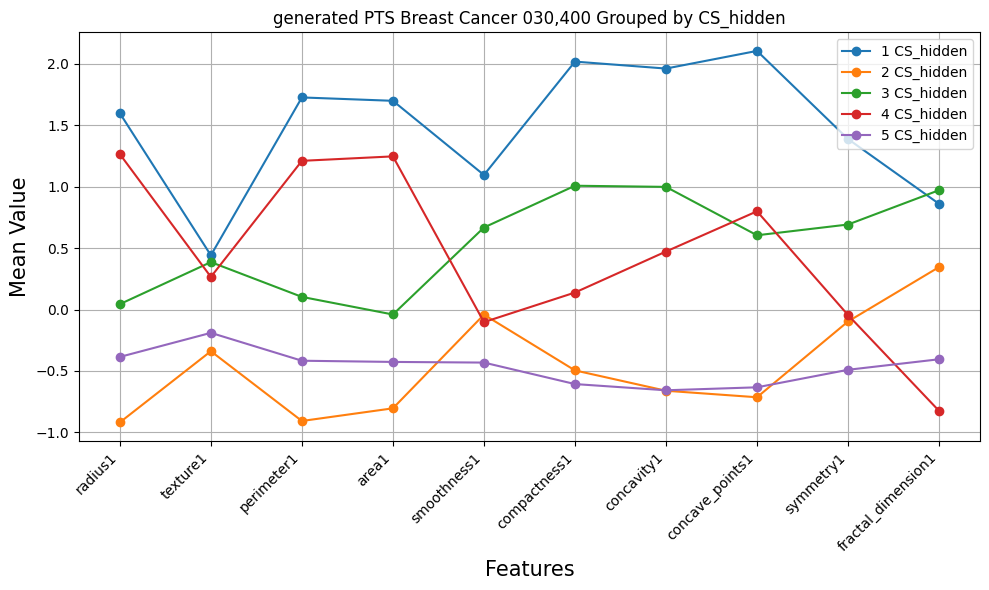

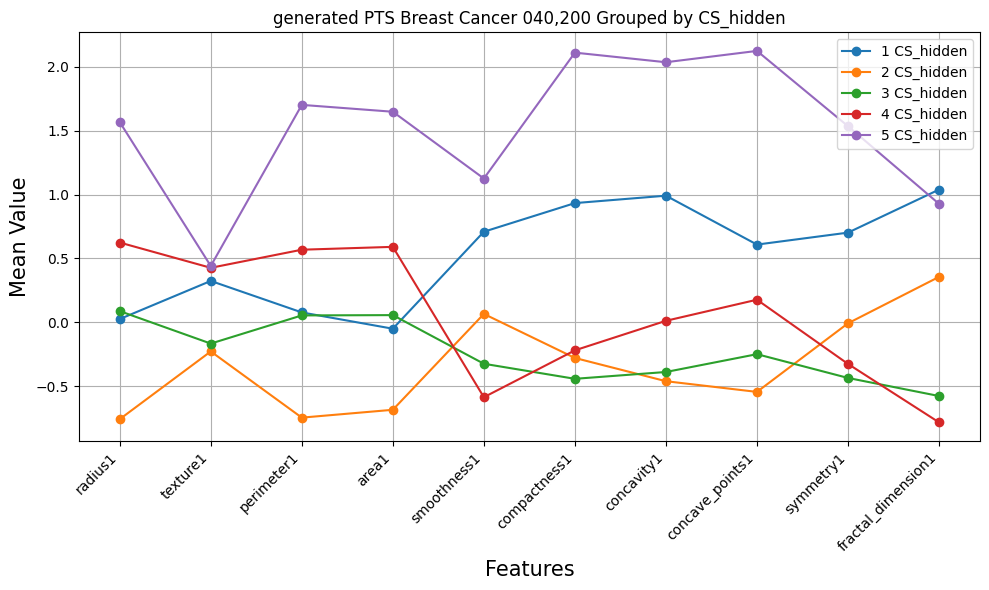

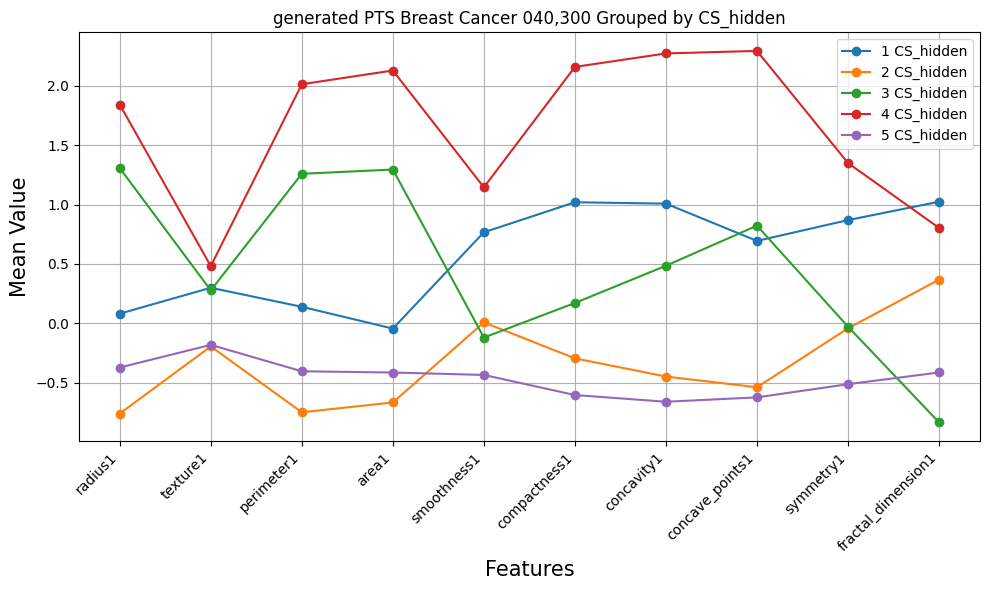

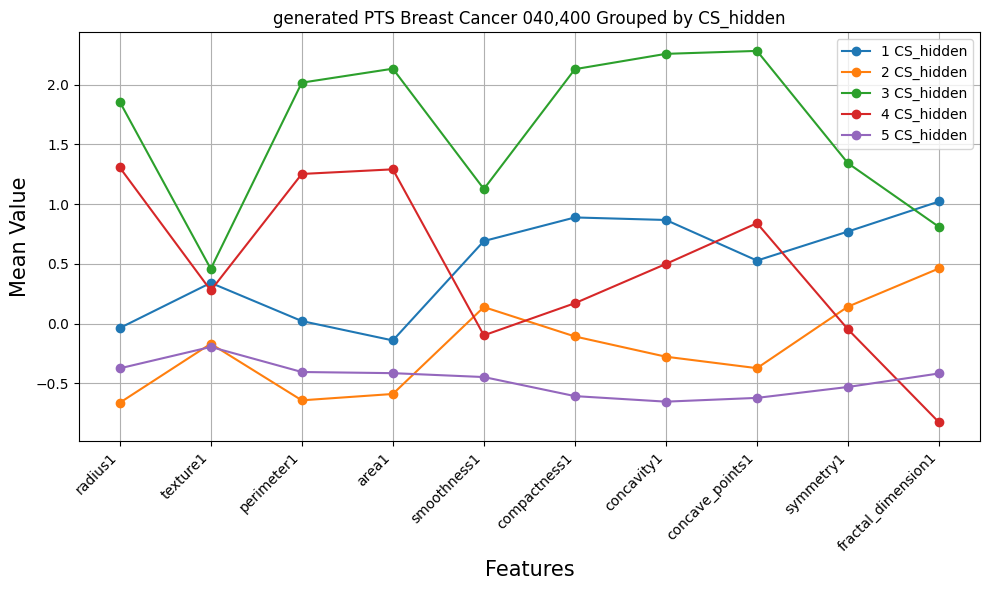

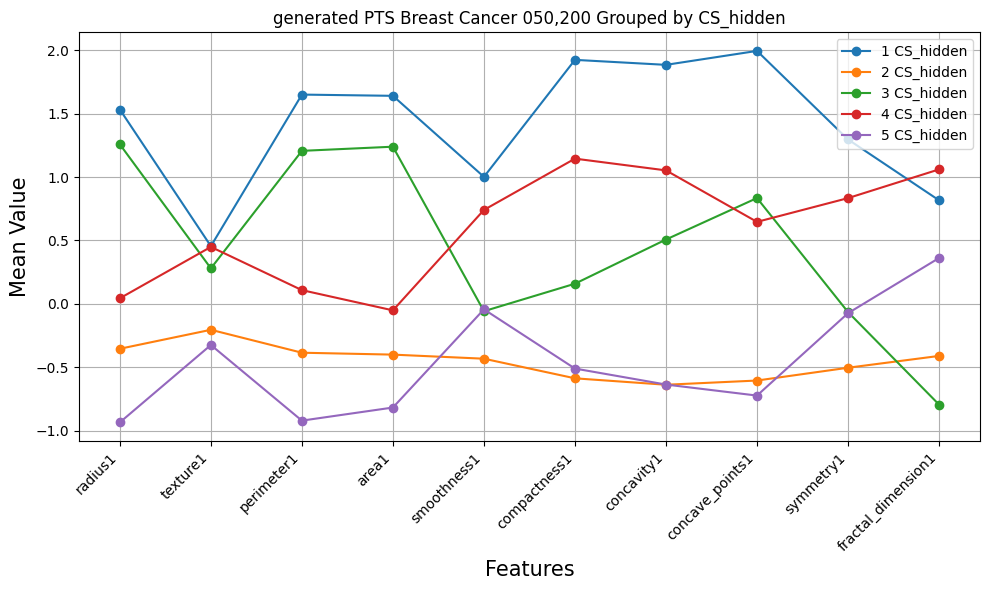

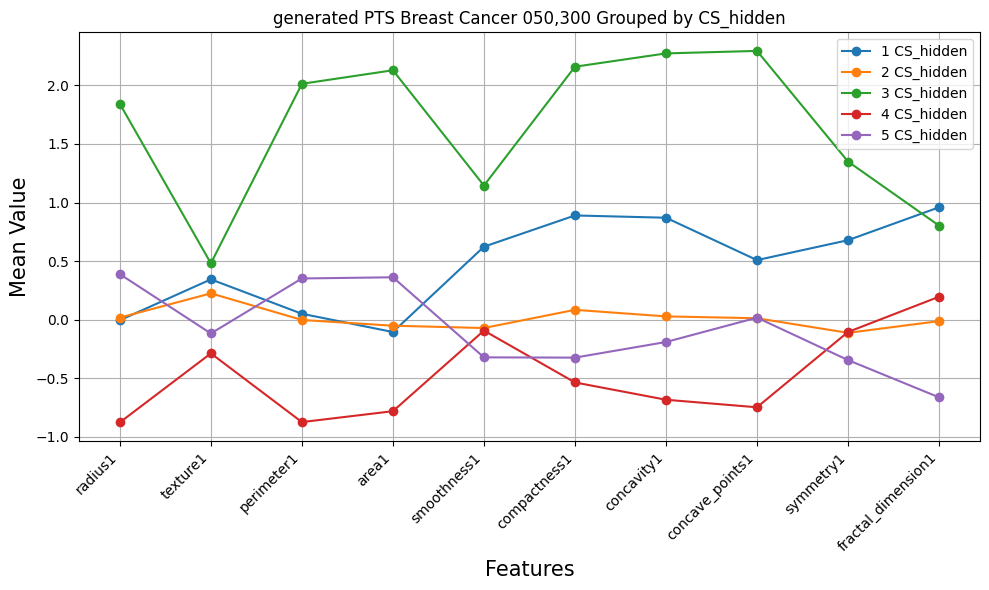

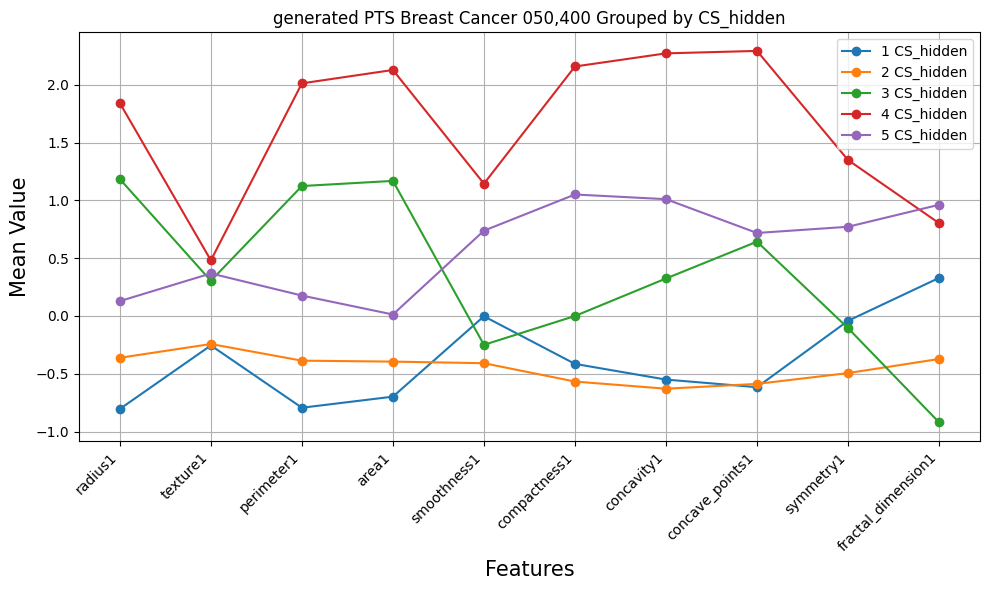

In [52]:
plot_mean_by_hidden_dict(single_dataframe_dict(merge_gen_BC_PTS),"generated PTS Breast Cancer", grouping="CS_hidden", ignore_col=ignore_col)

In [53]:
print(reorder([3, 5, 4, 1, 2]))
print(reorder([2, 4, 5, 3, 1]))
print(reorder([3, 1, 2, 5, 4]	))
print(reorder([1, 5, 2, 3, 4]	))
print(reorder([1, 4, 2, 5, 3]	))
print(reorder([1, 3, 2, 5, 4]	))
print(reorder([4, 1, 5, 2, 3]	))
print(reorder([1, 3, 4, 2, 5]	))
print(reorder([5, 4, 1, 2, 3]))

[4, 5, 1, 3, 2]
[5, 1, 4, 2, 3]
[2, 3, 1, 5, 4]
[1, 3, 4, 5, 2]
[1, 3, 5, 2, 4]
[1, 3, 2, 5, 4]
[2, 4, 5, 1, 3]
[1, 4, 2, 3, 5]
[3, 4, 5, 2, 1]


In [54]:
gen_BC_CS_order = {
    "030,200": [4, 5, 1, 3, 2],
    "030,300": [5, 1, 4, 2, 3],
    "030,400": [2, 3, 1, 5, 4],
    "040,200": [1, 3, 4, 5, 2],
    "040,300": [1, 3, 5, 2, 4],
    "040,400": [1, 3, 2, 5, 4],
    "050,200": [2, 4, 5, 1, 3],
    "050,300": [1, 4, 2, 3, 5],
    "050,400": [3, 4, 5, 2, 1]
}

Figure saved as generated_PTS_Breast_Cancer_030,200.png
Figure saved as generated_PTS_Breast_Cancer_030,300.png
Figure saved as generated_PTS_Breast_Cancer_030,400.png
Figure saved as generated_PTS_Breast_Cancer_040,200.png
Figure saved as generated_PTS_Breast_Cancer_040,300.png
Figure saved as generated_PTS_Breast_Cancer_040,400.png
Figure saved as generated_PTS_Breast_Cancer_050,200.png
Figure saved as generated_PTS_Breast_Cancer_050,300.png
Figure saved as generated_PTS_Breast_Cancer_050,400.png


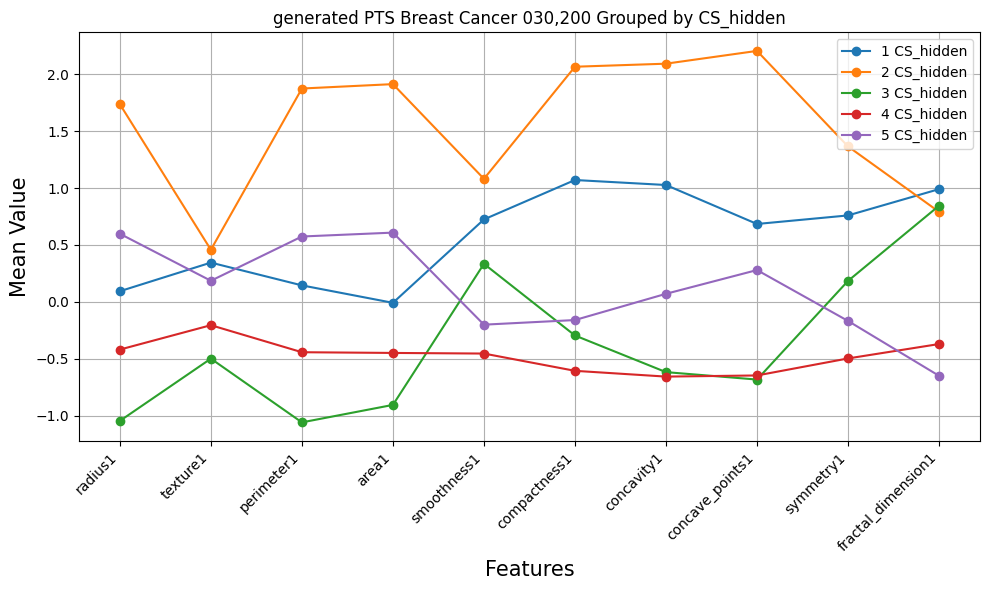

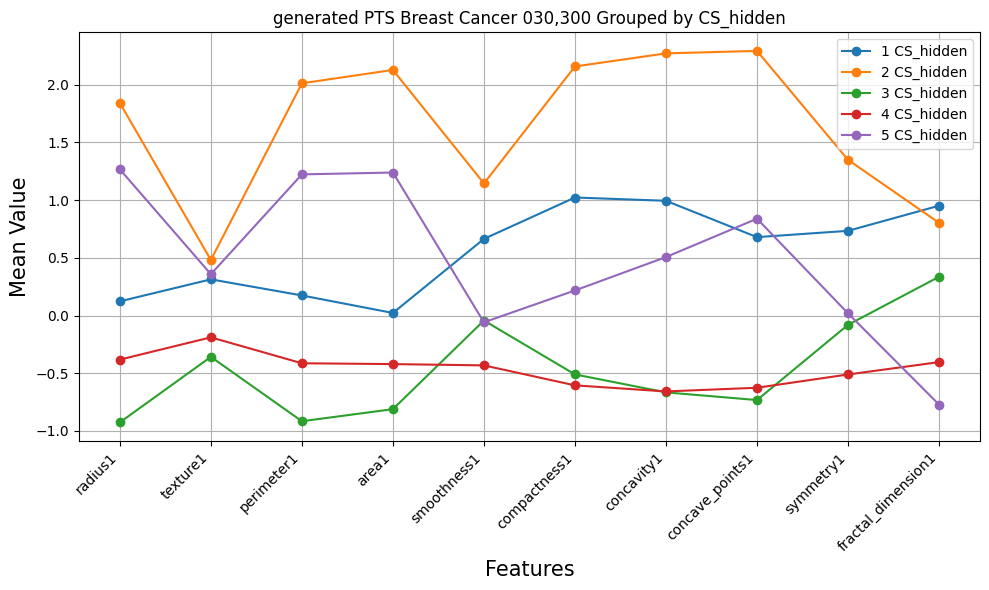

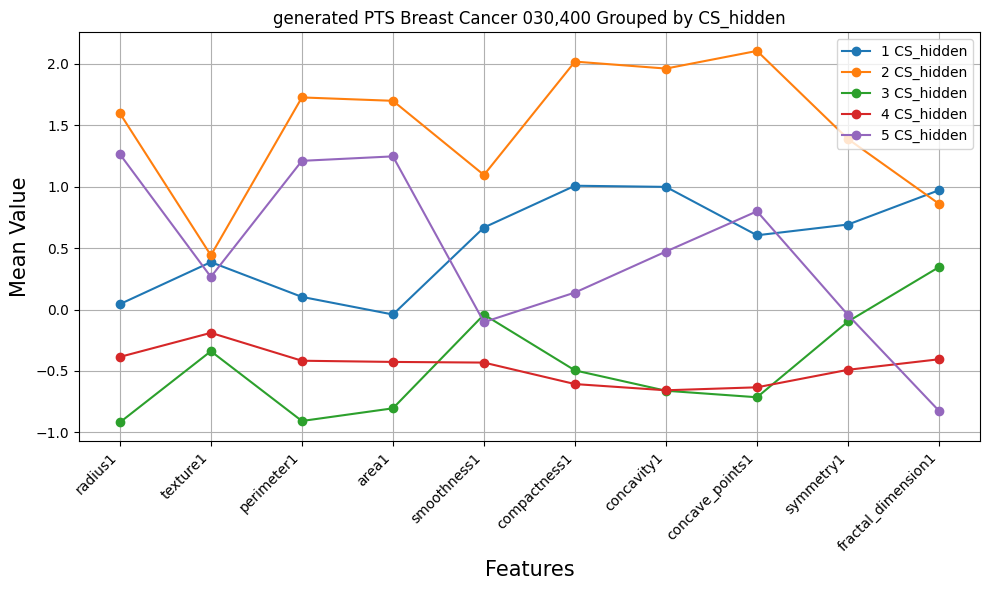

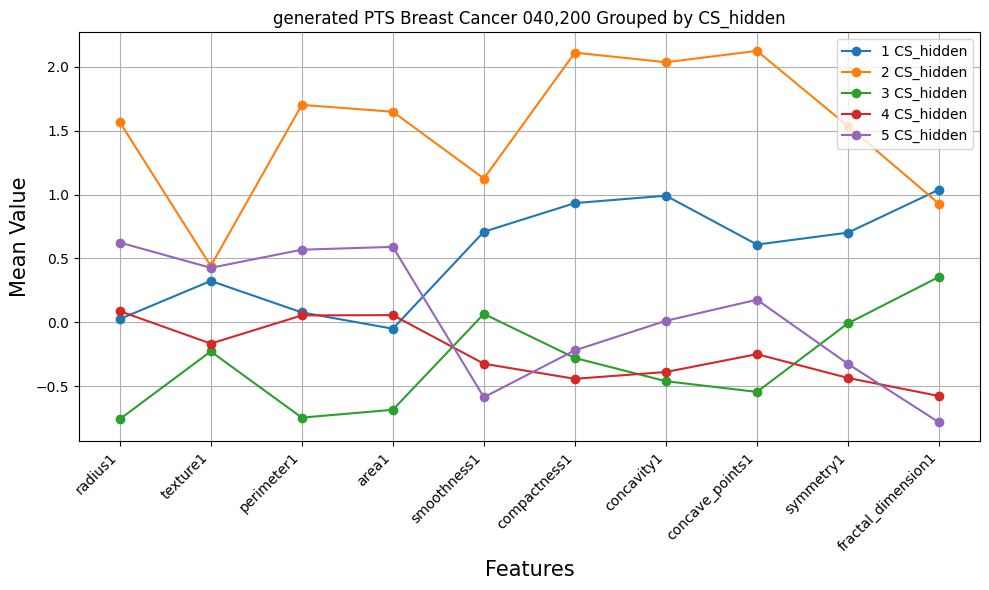

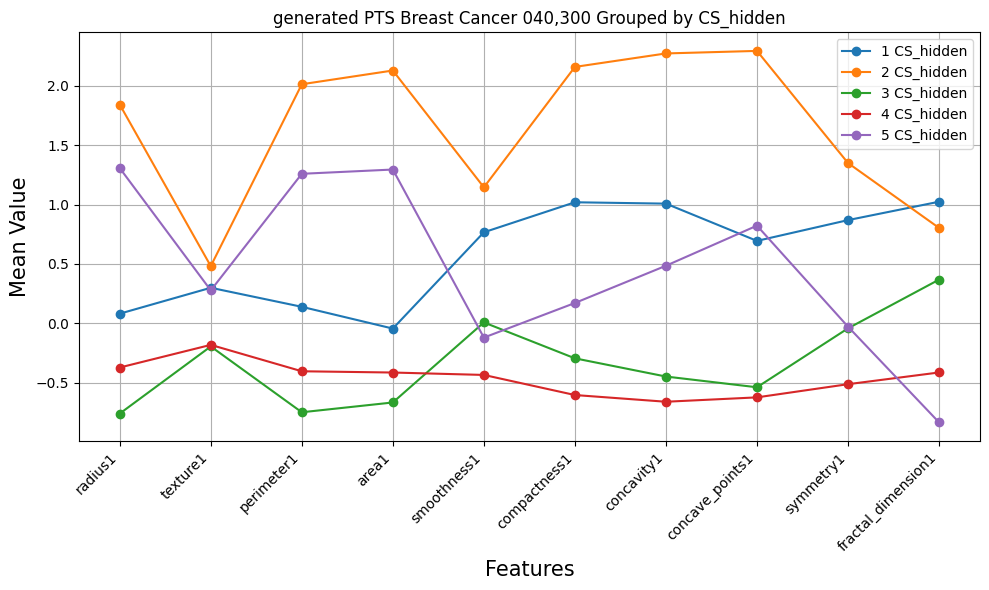

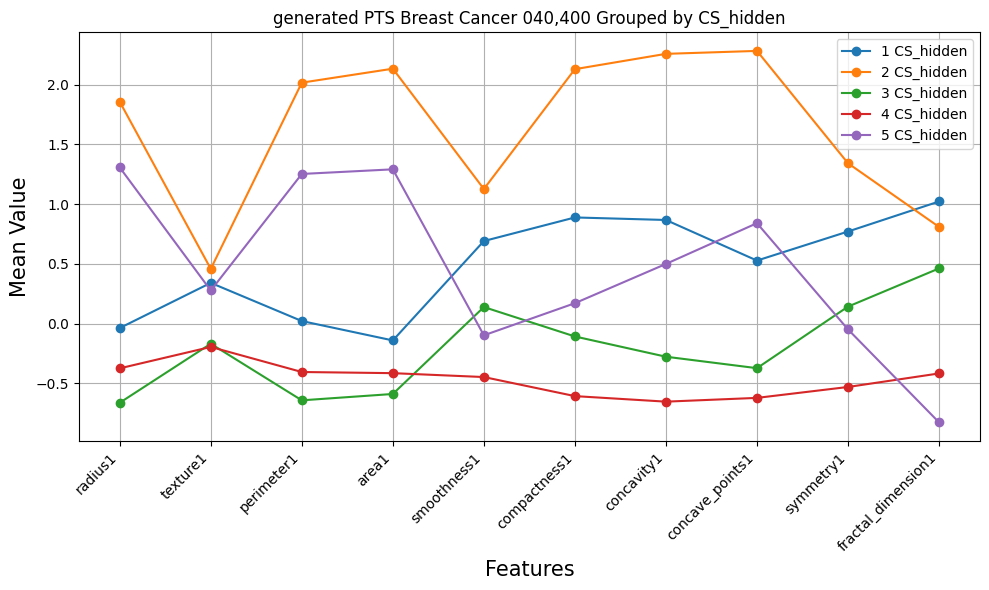

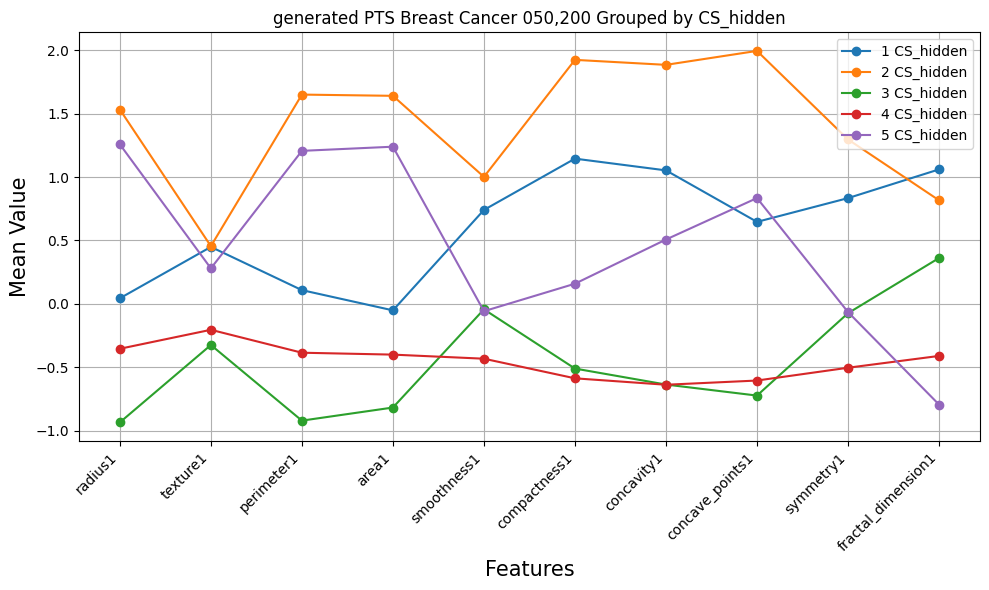

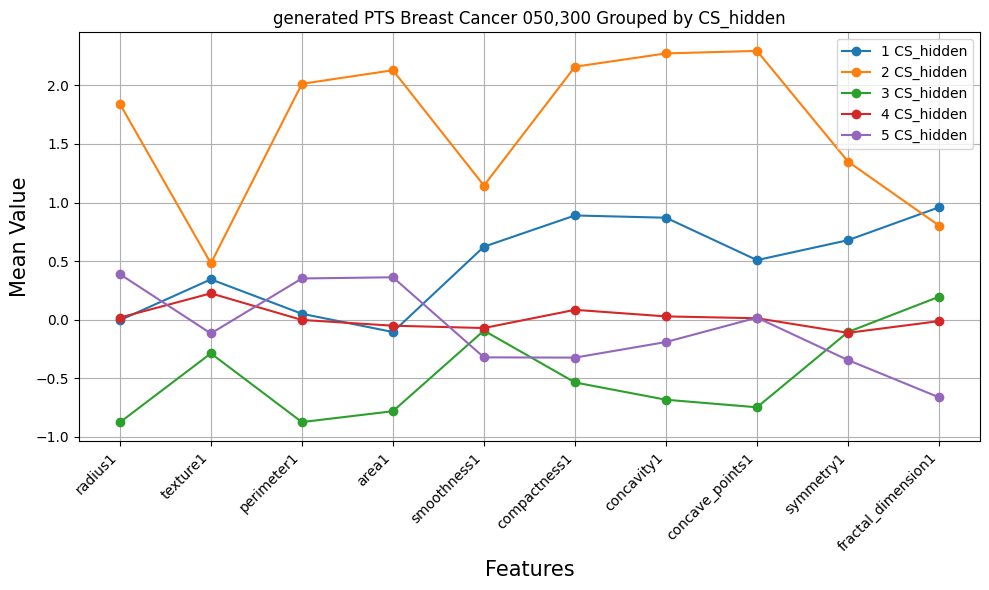

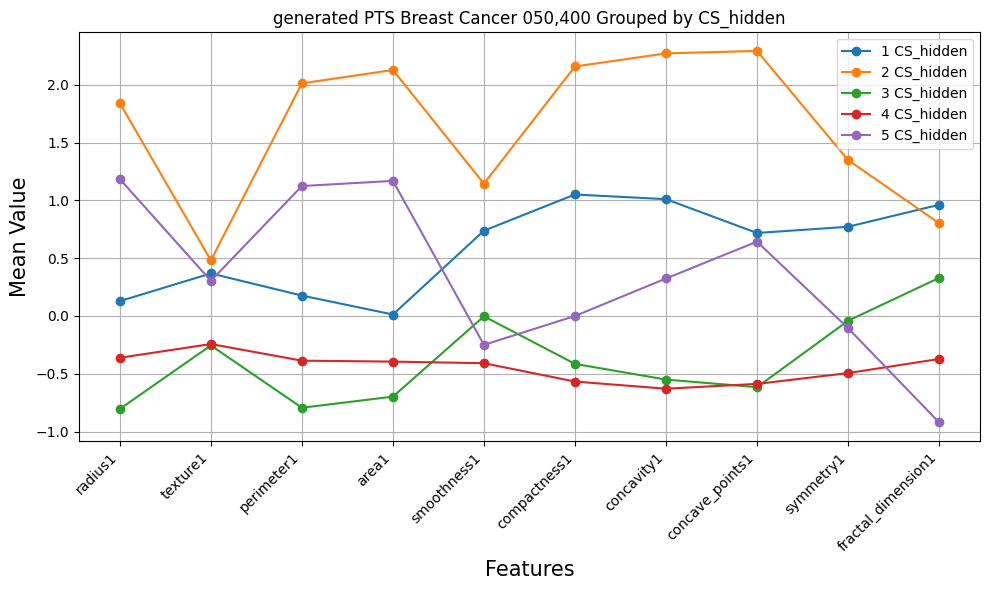

In [55]:
plot_mean_by_hidden_dict(single_dataframe_dict(merge_gen_BC_PTS),"generated PTS Breast Cancer", grouping="CS_hidden", ignore_col=ignore_col, rename_order=gen_BC_CS_order)

plotting 030,200:
Rename dictionary: {0: 'State 4', 1: 'State 5', 2: 'State 1', 3: 'State 3', 4: 'State 2'}


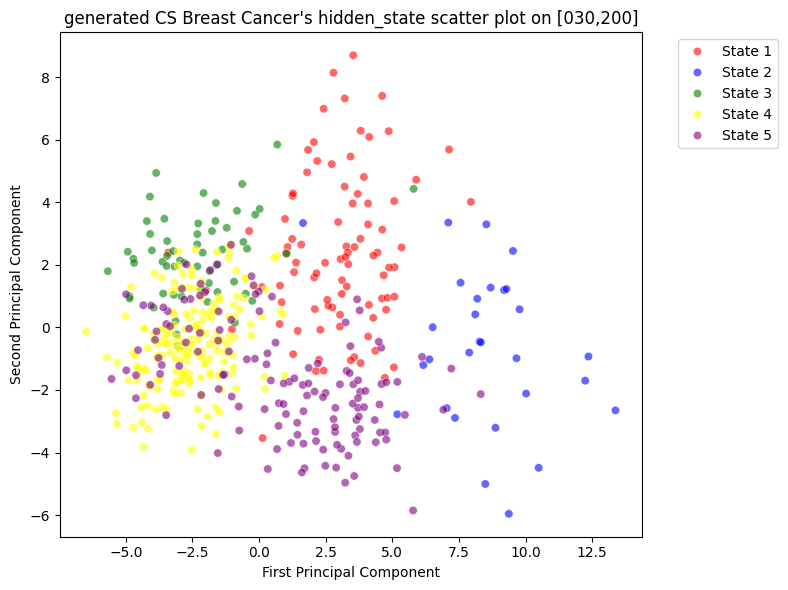

plotting 030,300:
Rename dictionary: {0: 'State 5', 1: 'State 1', 2: 'State 4', 3: 'State 2', 4: 'State 3'}


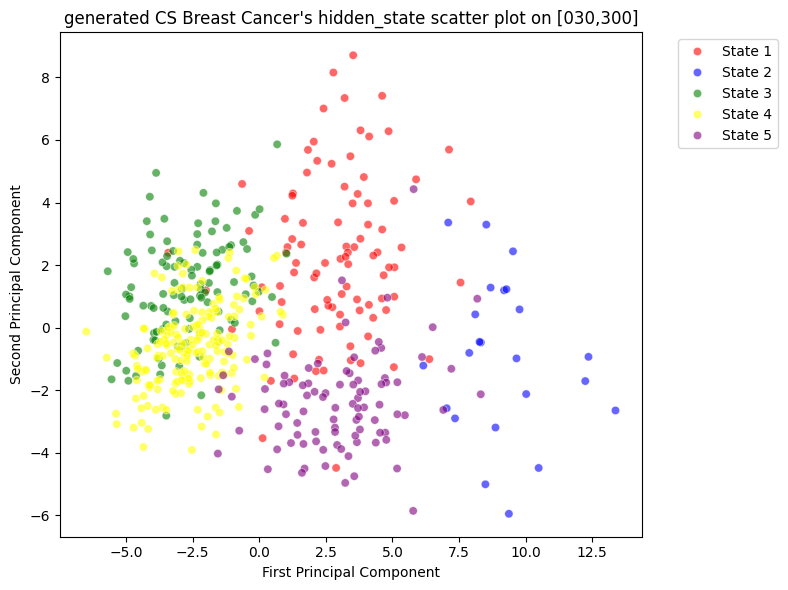

plotting 030,400:
Rename dictionary: {0: 'State 2', 1: 'State 3', 2: 'State 1', 3: 'State 5', 4: 'State 4'}


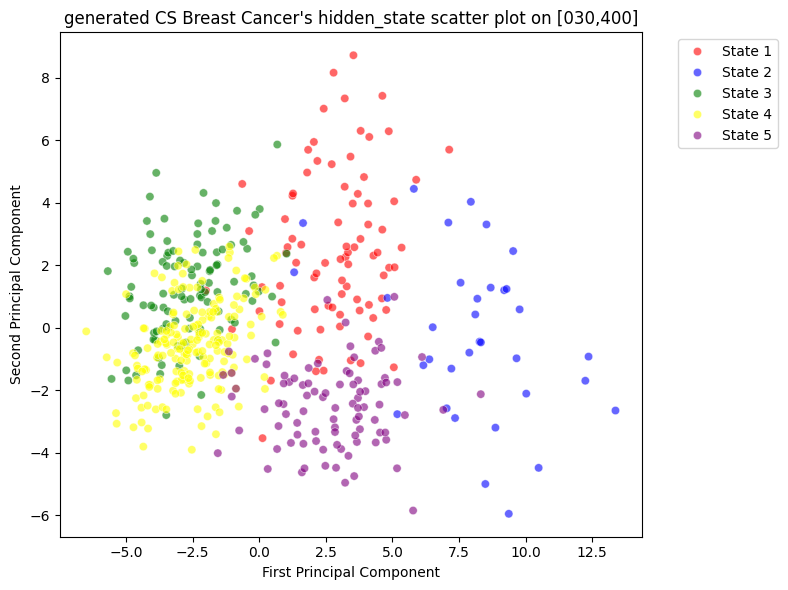

plotting 040,200:
Rename dictionary: {0: 'State 1', 1: 'State 3', 2: 'State 4', 3: 'State 5', 4: 'State 2'}


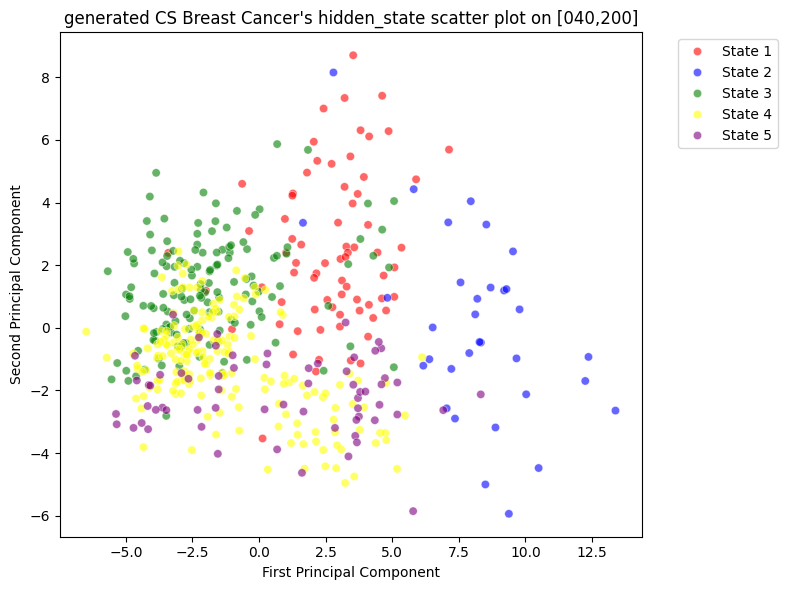

plotting 040,300:
Rename dictionary: {0: 'State 1', 1: 'State 3', 2: 'State 5', 3: 'State 2', 4: 'State 4'}


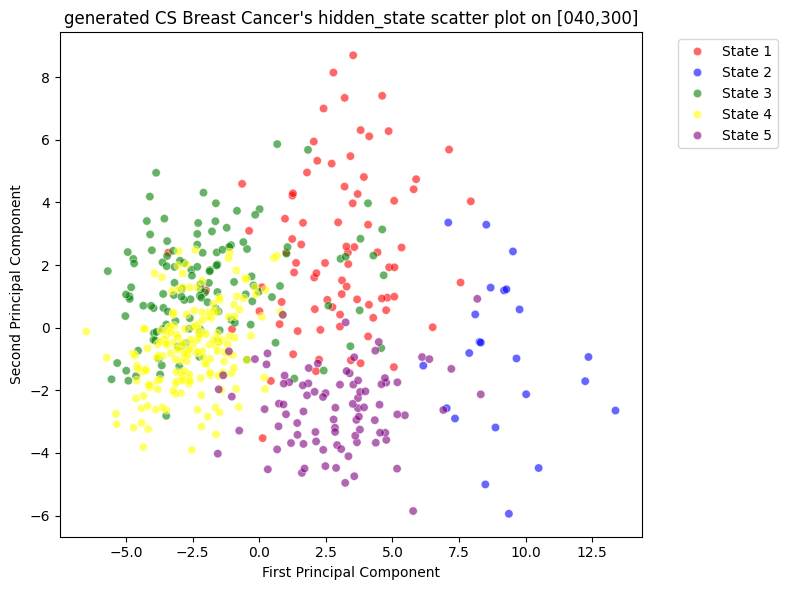

plotting 040,400:
Rename dictionary: {0: 'State 1', 1: 'State 3', 2: 'State 2', 3: 'State 5', 4: 'State 4'}


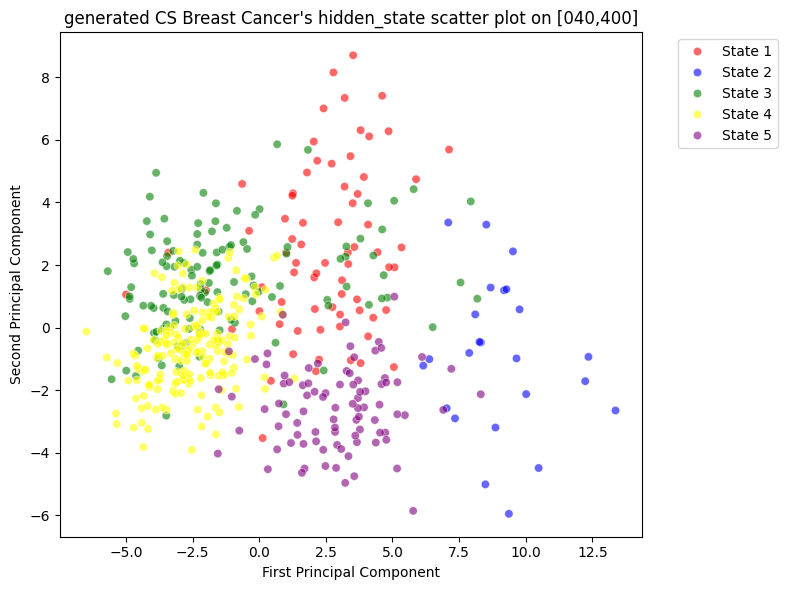

plotting 050,200:
Rename dictionary: {0: 'State 2', 1: 'State 4', 2: 'State 5', 3: 'State 1', 4: 'State 3'}


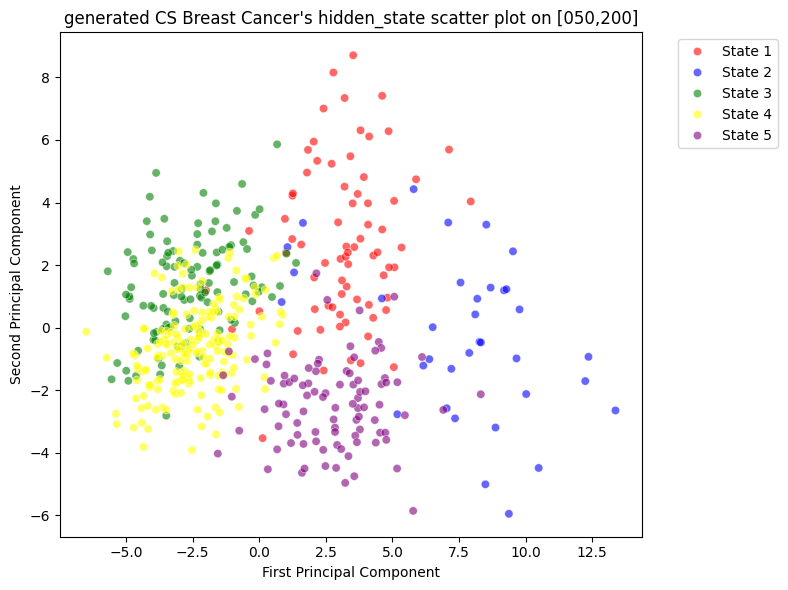

plotting 050,300:
Rename dictionary: {0: 'State 1', 1: 'State 4', 2: 'State 2', 3: 'State 3', 4: 'State 5'}


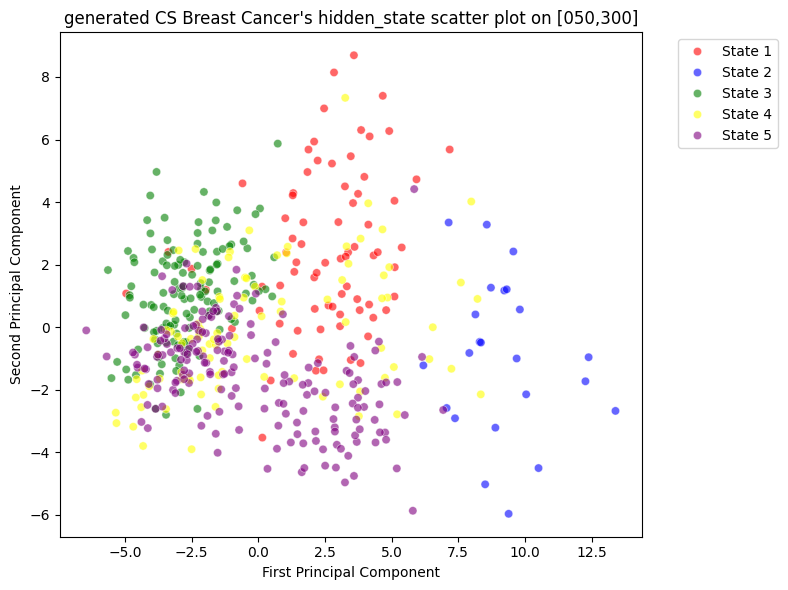

plotting 050,400:
Rename dictionary: {0: 'State 3', 1: 'State 4', 2: 'State 5', 3: 'State 2', 4: 'State 1'}


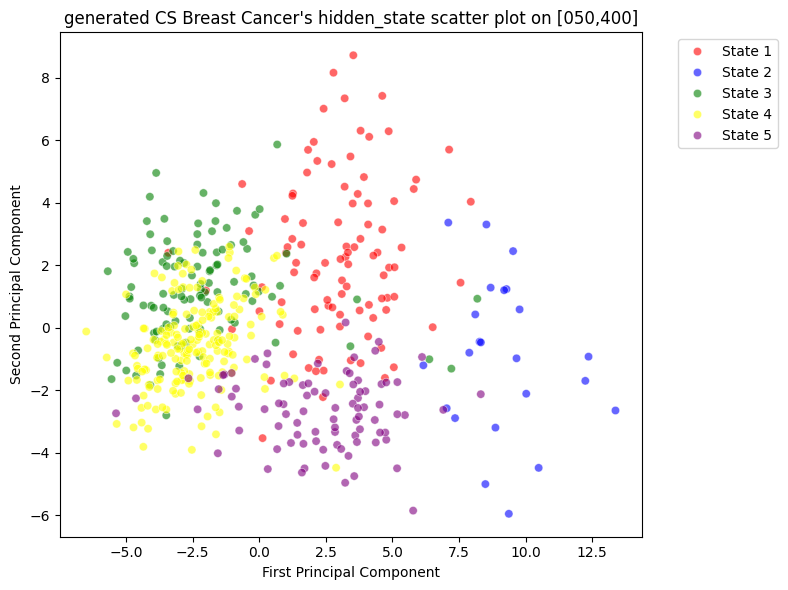

In [56]:
for key, value in merge_gen_BC_PTS.items():
    print(f"plotting {key}:")
    plotting_trajectory(single_dataframe(value),target_col="CS_hidden",
                        title=f"generated CS Breast Cancer's hidden_state scatter plot on [{key}]",
                        colors=["red", "blue", "green","yellow","purple"], rename_order= gen_BC_CS_order[key])

In [57]:
gen_BC_PTS_model_matrix = transitional_matrix(gen_BC_PTS_model,order_dict=gen_BC_CS_order, filename="0_gen_BC_PTS_matrix.txt")

In [58]:
save_dict_dataframes_to_excel(gen_BC_PTS_checkstat,"0_gen_BC_PTS_checkstat.xlsx")

DataFrames have been saved to 0_gen_BC_PTS_checkstat.xlsx


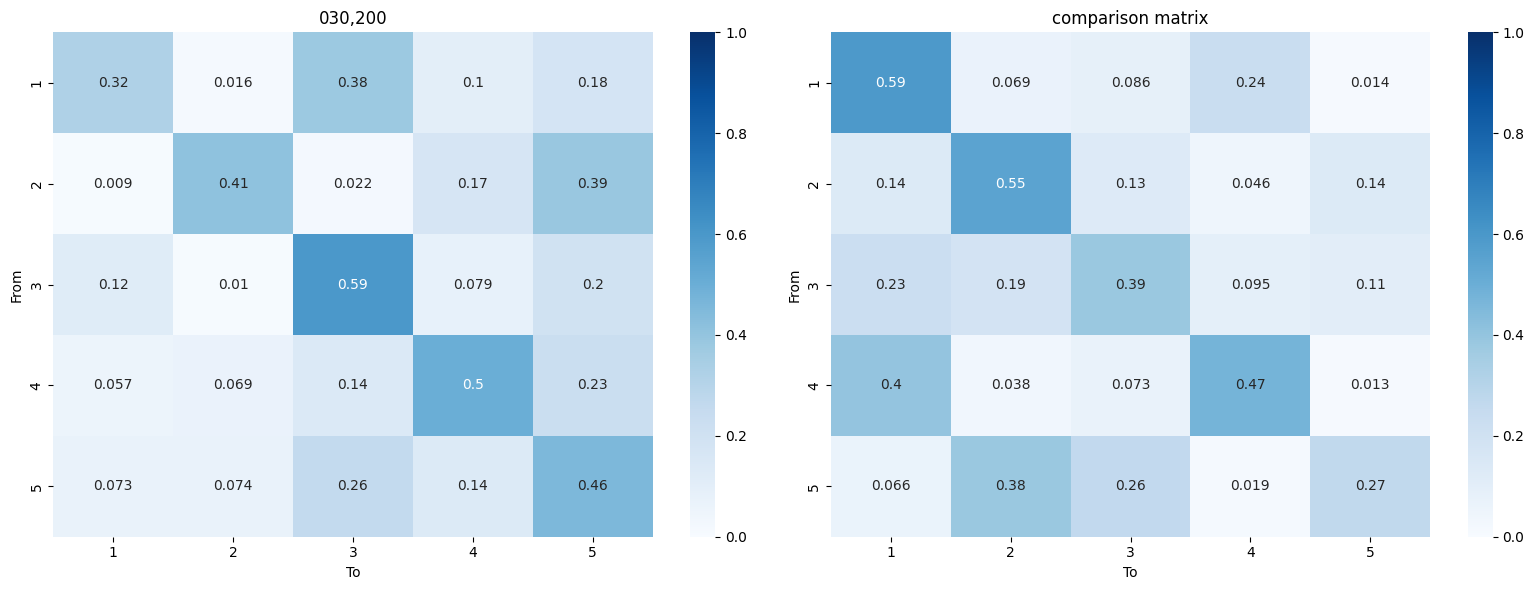

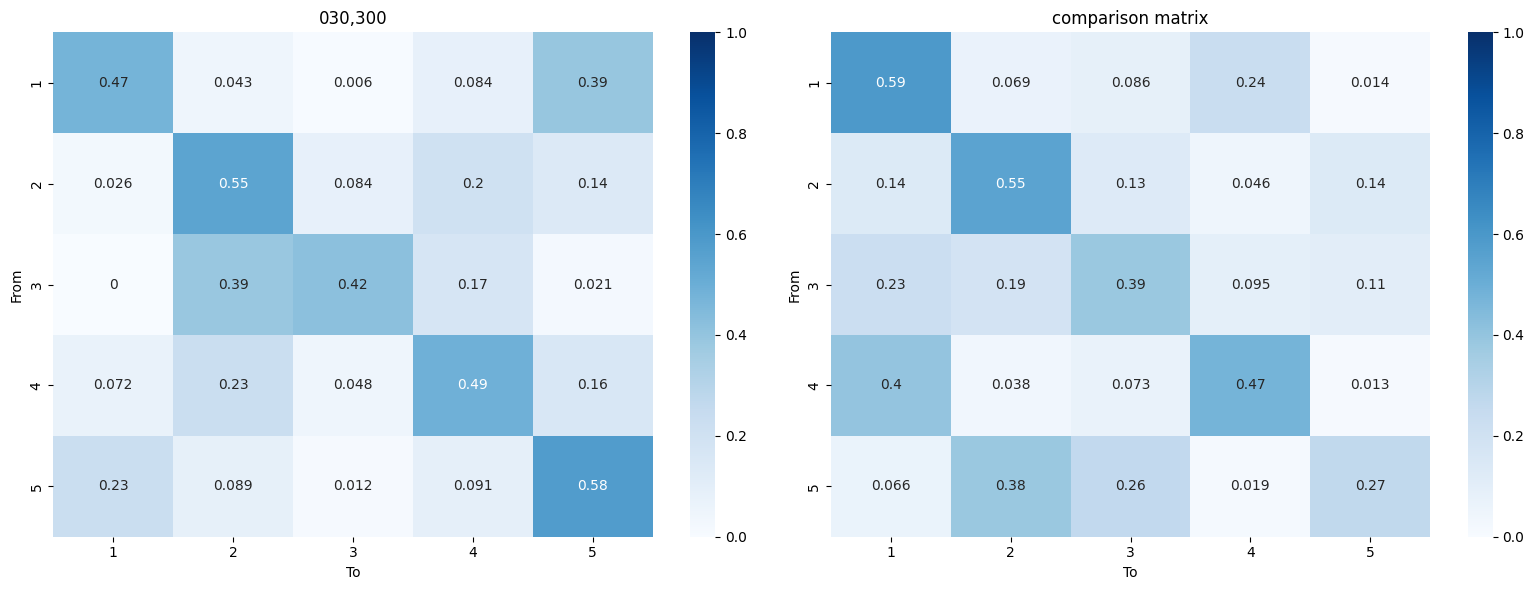

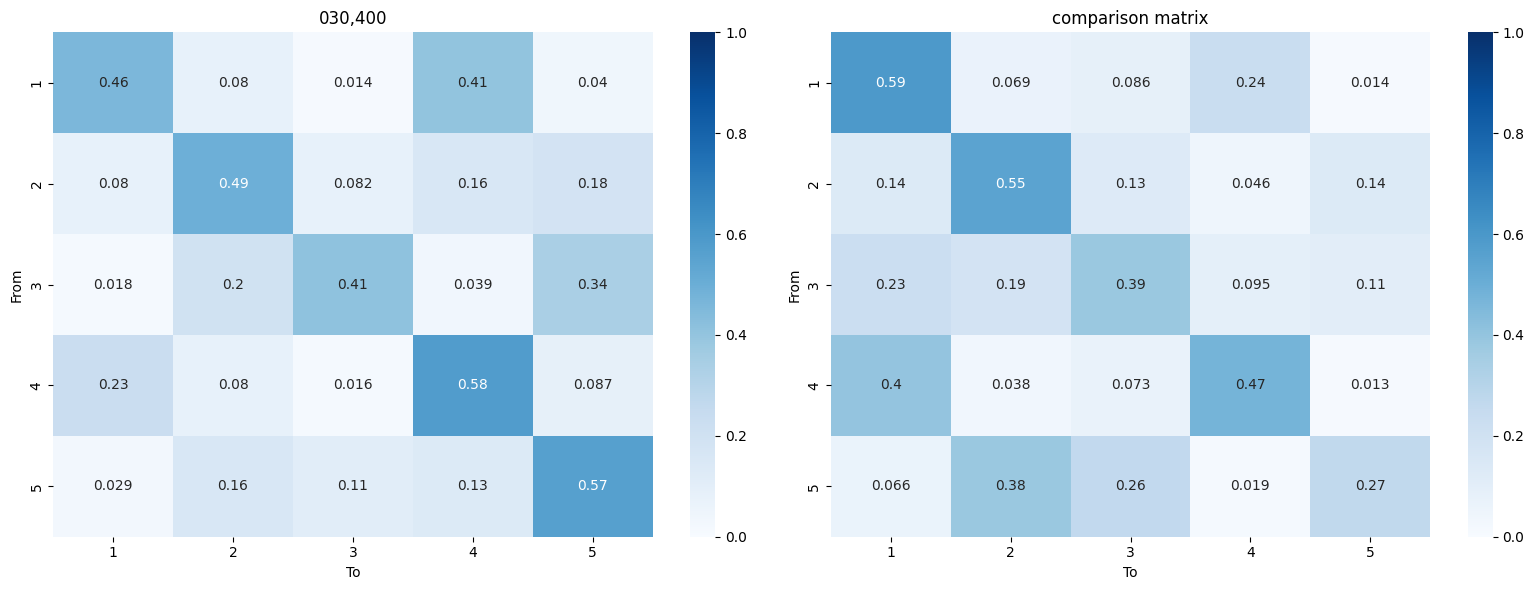

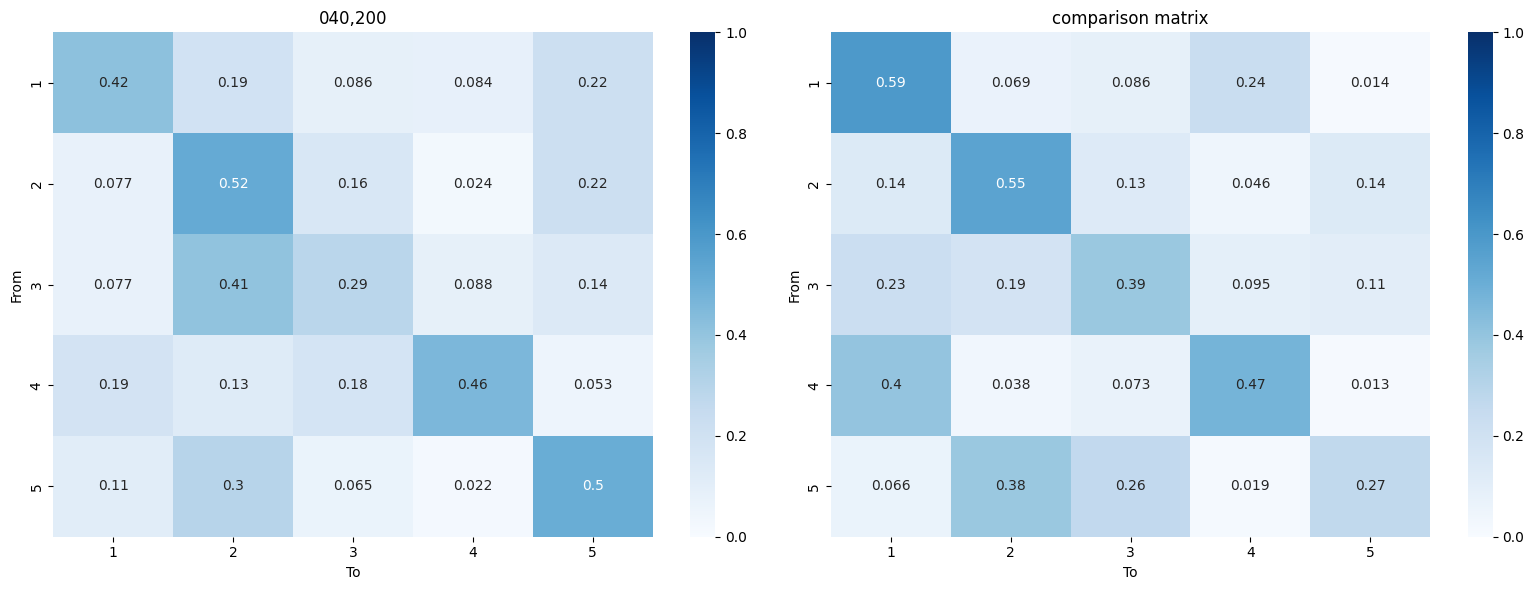

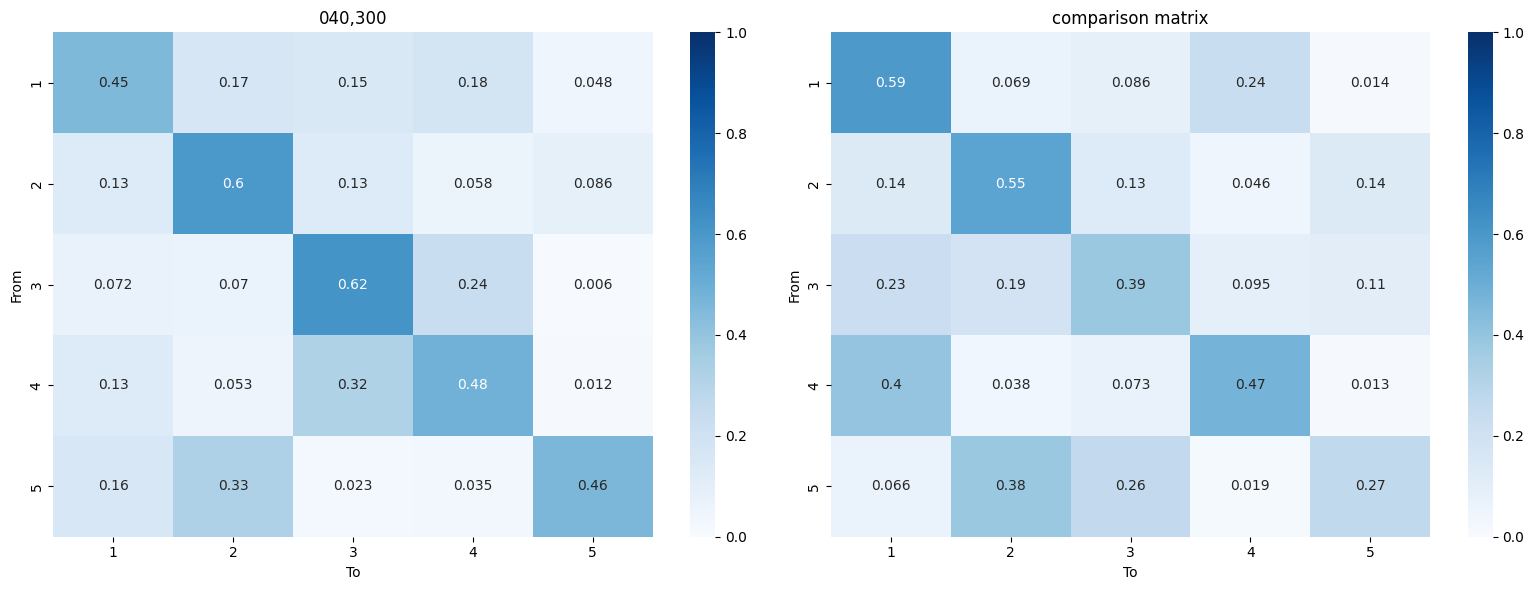

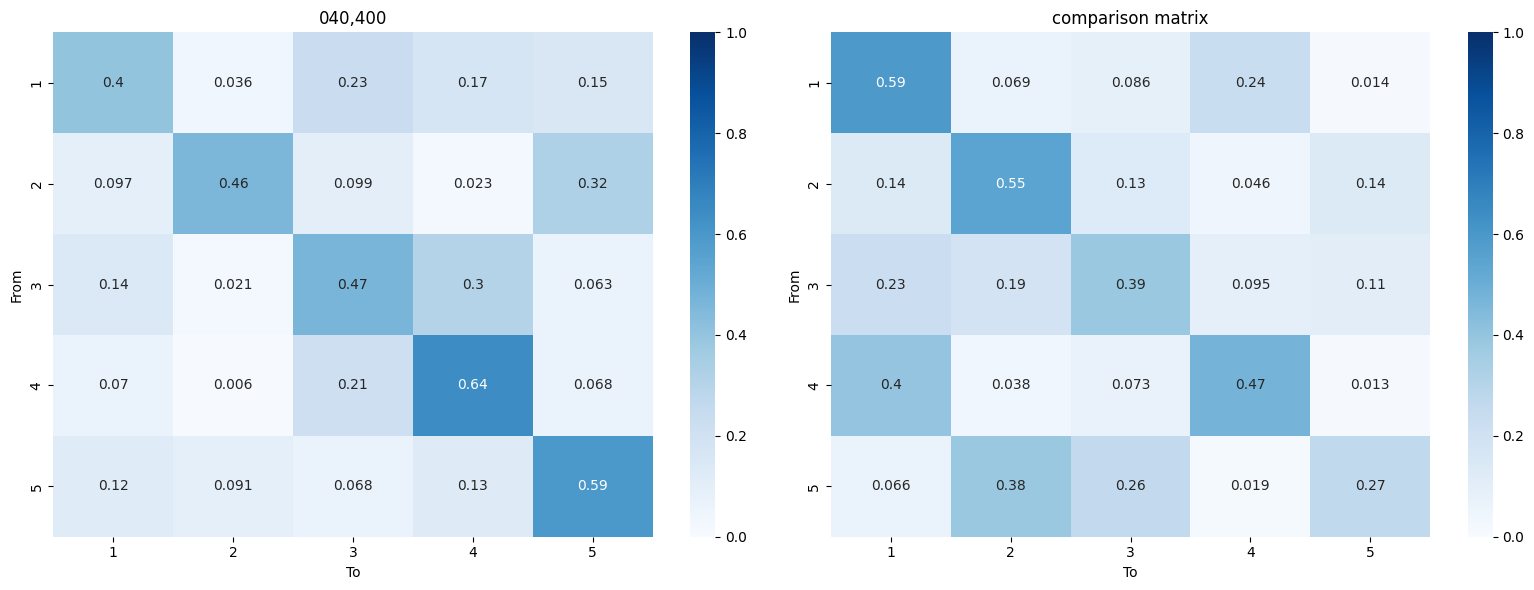

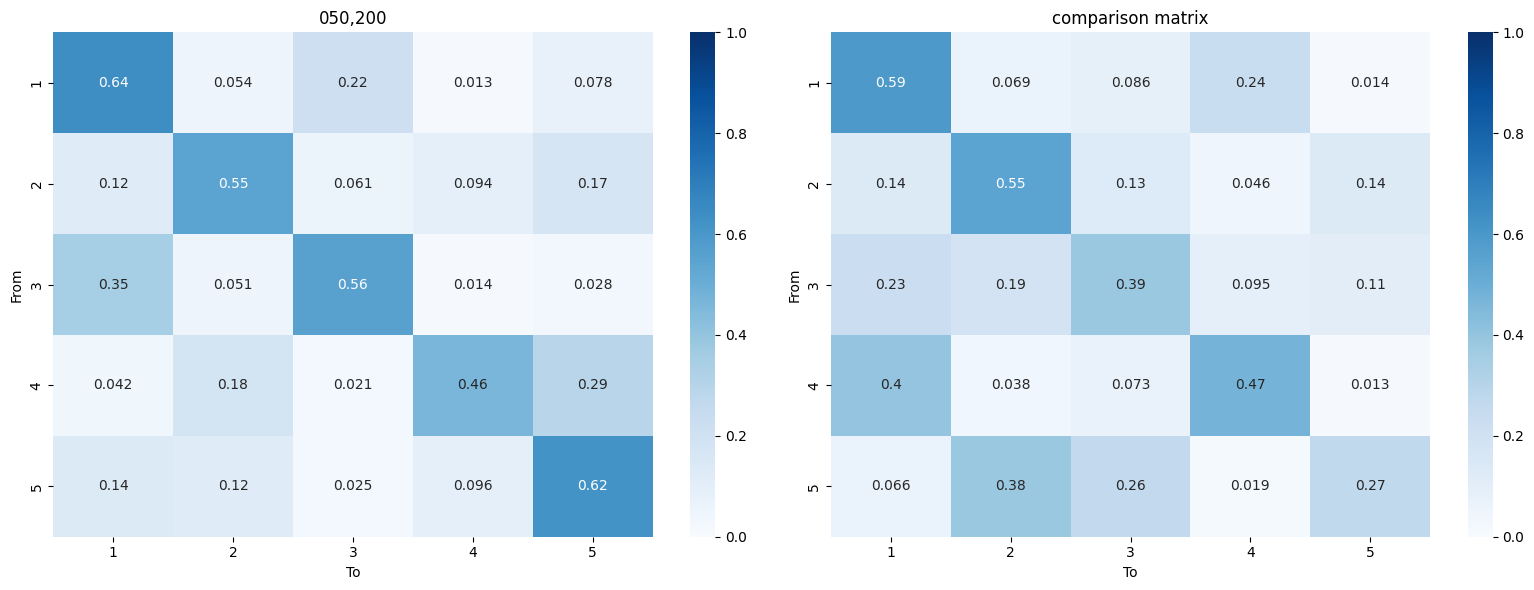

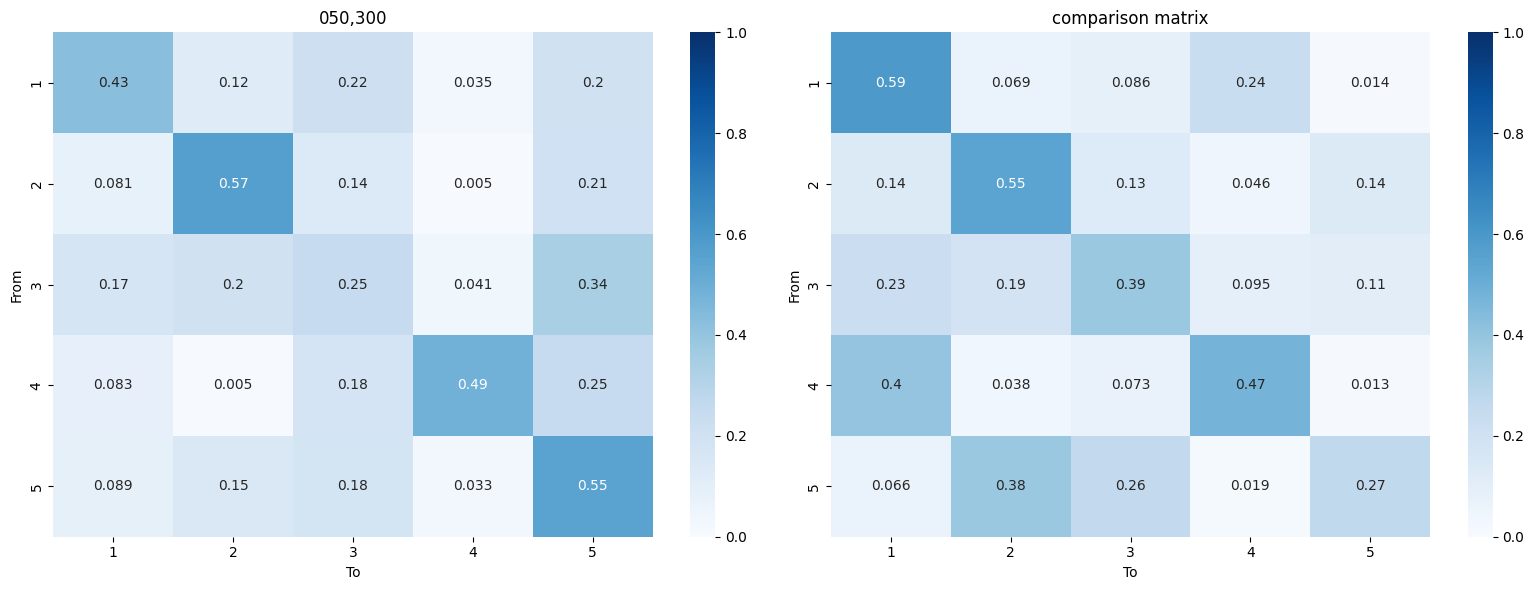

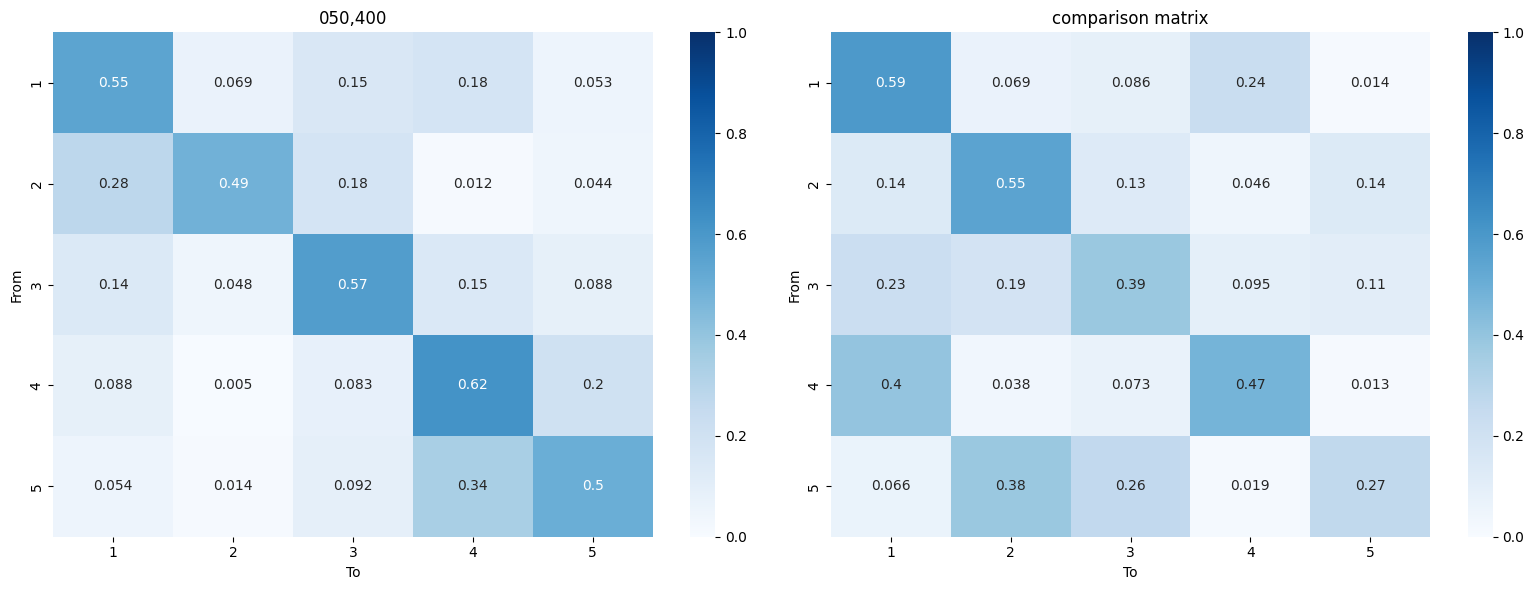

In [59]:
compare_single_matrices(gen_BC_PTS_model_matrix, BC_align_matrix["030,200"])

In [60]:
abs_diff_gen_BC_PTS = abs_diff_matrix_dict(gen_BC_PTS_model_matrix, BC_align_matrix["030,300"])

030,200: 2.379
030,300: 3.177
030,400: 3.016
040,200: 3.076
040,300: 3.447
040,400: 2.477
050,200: 2.186
050,300: 2.927
050,400: 2.956


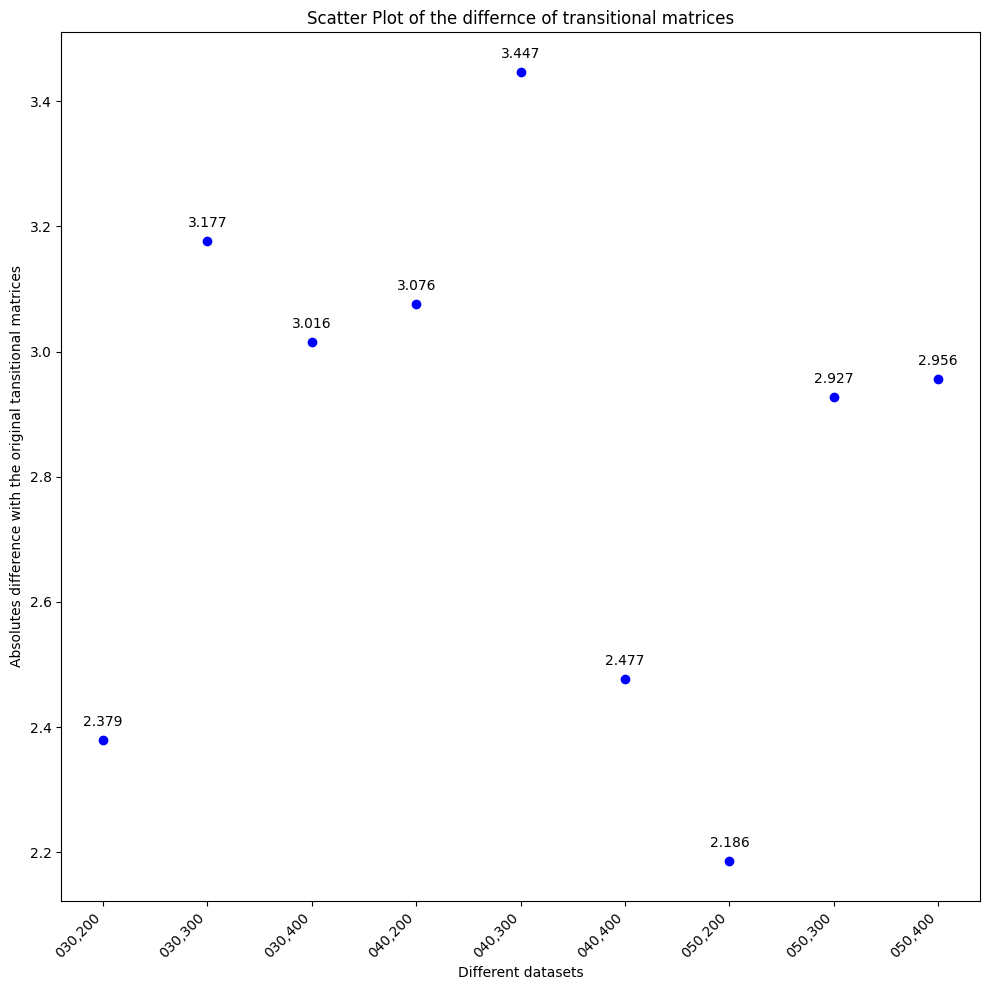

In [61]:
plot_scatter_for_bias(abs_diff_gen_BC_PTS)